# Impact of Weather on Home Sales In King County, WA

##### This project investigates the impact of different weather conditions on the home sales and home prices through 2014 and 2015 in King County, WA. Different properties of the homes and theirimpact on the price of the houses have been studied. Also different biases which might have existed have been investigated, addressed and explained. The house sales dataset is in the form of csv and has been obtained from Kaggle and the weather dataset is in the form of a json file and has been purchased from Open Weather Map.


In [1]:
#The modules required are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics
import matplotlib as mpl

In [2]:
#creating a file path and reading the house sales dataset (which is a csv file) 
file = '../Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Modifying date in the house sales dataset in order to normalize it with the date on the weather dataset
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [4]:
#Removing the day and month from the date to keep only the month and year to perform investigations by month and year
dateym=[]
num = 0
for index, row in df.iterrows():
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

In [5]:
#Insrting the month and year obtained above into a new column
df['date(Y/M)']=dateym

In [6]:
#In the house sales dataset a house with 33 bedrooms was noticed which on the basis of its square feet seemed to be wrong and here is being eleminated 
df.loc[df['bedrooms']==33]
df1=df[df.bedrooms != 33]


In [7]:
#Obtaining the average price of the houses build in each year
buildyrdf=df1.groupby('yr_built').mean()

buildyrdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,,
1900,5.060402e+09,581536.632184,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,6.873563,1487.068966,244.942529,435.344828,98104.655172,47.594106,-122.288874,1667.114943,7222.195402
1901,5.036920e+09,557108.344828,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,7.034483,1513.620690,250.000000,68.517241,98121.000000,47.630710,-122.329793,1530.965517,3947.862069
1902,4.280460e+09,673192.592593,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889
1903,4.508135e+09,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,6.869565,1402.869565,104.869565,260.130435,98105.608696,47.591474,-122.287261,1537.608696,5303.760870
1904,4.542878e+09,583867.755556,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,6.911111,1307.177778,296.000000,266.400000,98117.933333,47.609891,-122.316822,1630.222222,4600.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,4.787524e+09,544648.384615,3.469231,2.640385,2313.684615,6519.692308,2.015385,0.000000,0.107692,3.000000,8.184615,2170.415385,143.269231,0.000000,98063.053846,47.522833,-122.169854,2226.715385,5630.415385
2012,5.149959e+09,527436.982353,3.576471,2.641176,2378.741176,6085.535294,1.994118,0.005882,0.094118,3.000000,8.182353,2276.447059,102.294118,0.000000,98062.041176,47.501455,-122.139559,2246.658824,5806.547059
2013,4.447780e+09,678599.582090,3.845771,2.850746,2636.592040,7338.079602,2.042289,0.000000,0.179104,3.000000,8.467662,2464.726368,171.865672,0.000000,98066.348259,47.526551,-122.143856,2340.721393,7890.442786


### Dependence of House Prices on the Year in which they were buit 

##### As observed in the graph below the average price for the older houses (built before 1940) seems to be higher. The average price of the houses built between 1940 and 1980 seems to be stable and after 1980 the newer houses have a higher price. The price seems to have a gentle correlation with the newness of the house. The newer the house, the higher the price which is logical. On the other hand, the high prices asspciated with older houses might be due to their historicl value or bigger size as houses tended to be bigger at old times.

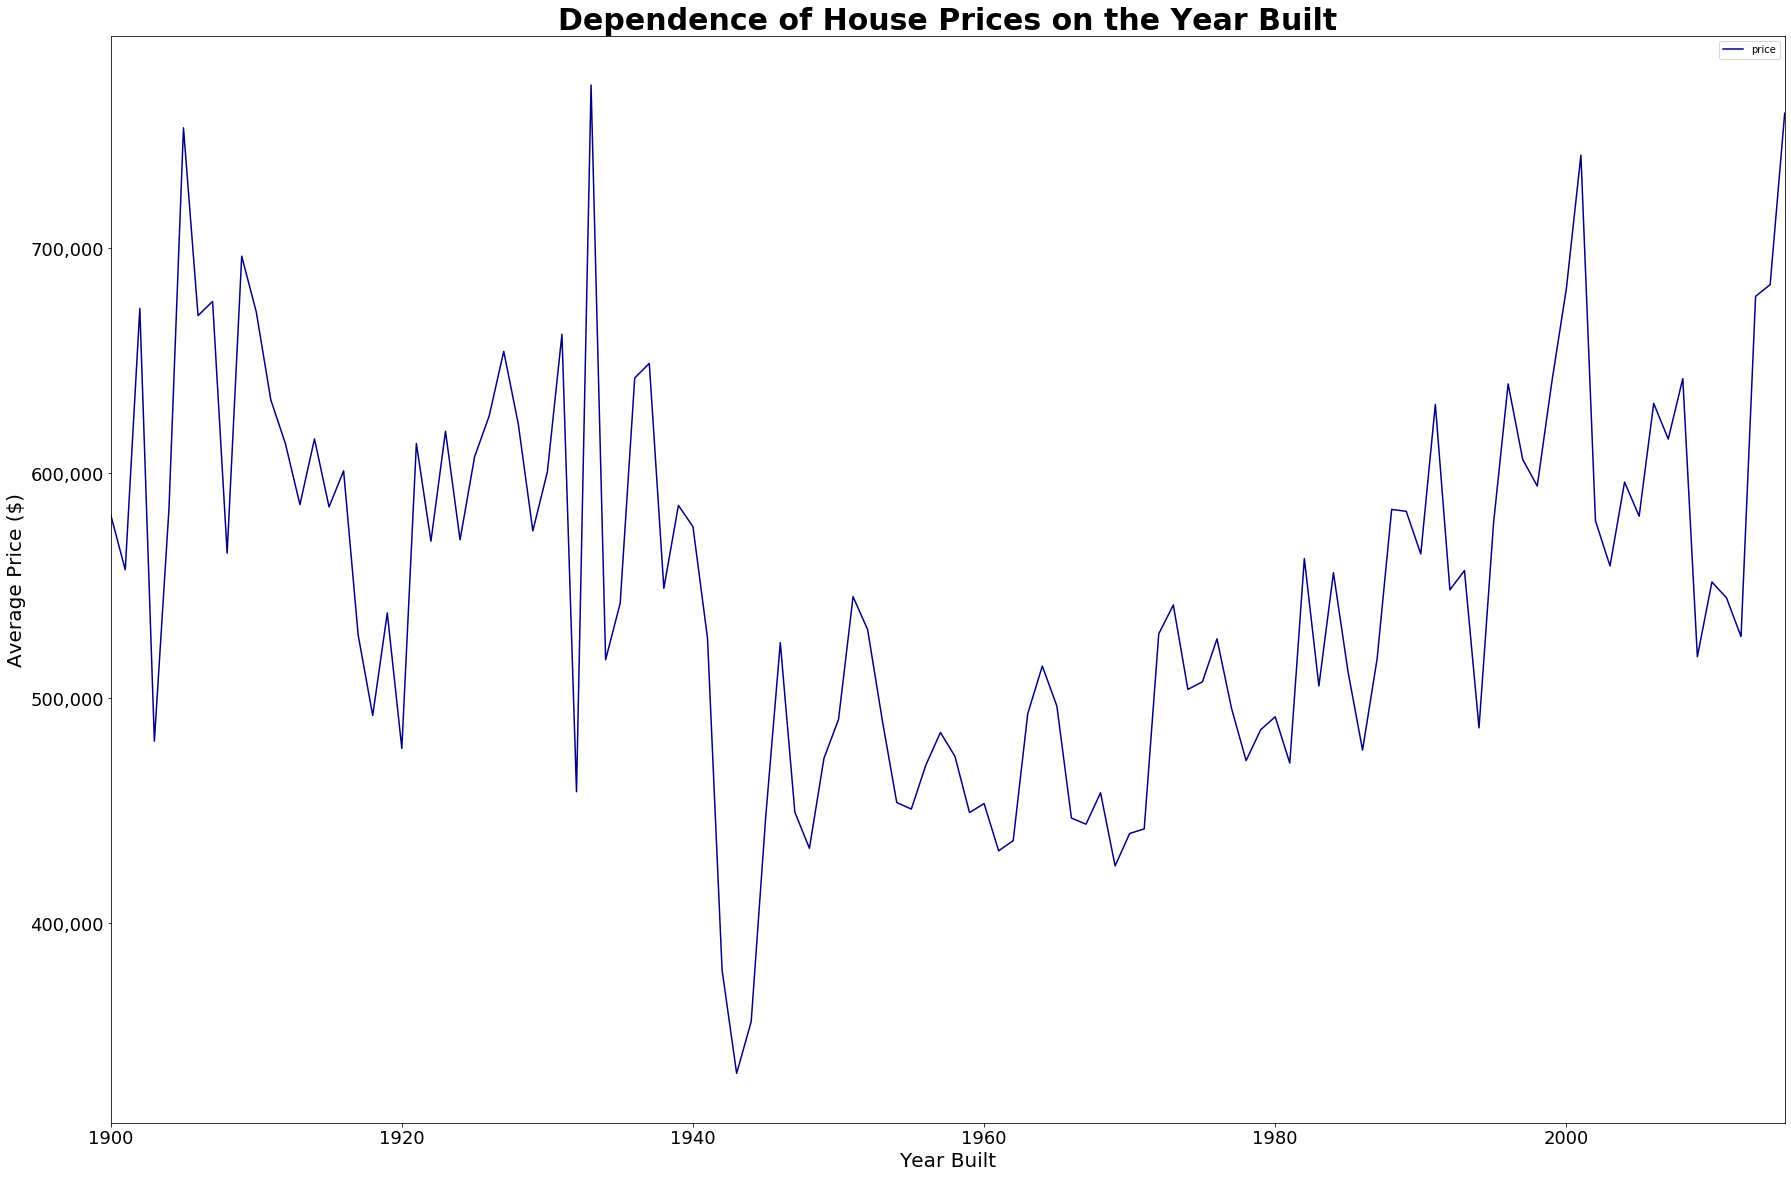

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [17]:
#Plotting the average price of the houses against the year when they were built.   
ax=buildyrdf.plot(kind='line', y='price', color='navy')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Year Built", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Year Built", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Average Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsyearbuilt.png')


In [15]:
#Obtaining the average price of the houses by the number of bedrooms
bedroomdf=df1.groupby('bedrooms').mean()
bedroomdf

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,4.632838e+09,4.102231e+05,0.826923,1707.846154,24141.307692,1.961538,0.000000,0.307692,2.846154,6.692308,1707.846154,0.000000,1983.846154,0.000000,98066.692308,47.511415,-122.150231,2036.923077,26097.076923
1,4.143251e+09,3.176580e+05,1.066583,884.613065,16285.673367,1.150754,0.025126,0.246231,3.266332,6.100503,823.859296,60.753769,1942.663317,169.638191,98103.417085,47.567169,-122.256854,1449.567839,14240.221106
2,4.636499e+09,4.013877e+05,1.401721,1239.752899,12096.726087,1.306703,0.011232,0.178623,3.377899,6.871739,1107.240942,132.511957,1955.413043,81.382609,98105.953623,47.588601,-122.278570,1503.785507,9693.109058
3,4.535884e+09,4.662766e+05,1.968394,1805.837235,14414.790208,1.449410,0.006515,0.187805,3.415513,7.472516,1584.442284,221.394951,1971.812602,76.001425,98076.478217,47.551478,-122.213344,1835.443506,12809.343648
4,4.658470e+09,6.355647e+05,2.436428,2554.649666,16720.793374,1.616100,0.005812,0.268091,3.406568,8.116681,2198.300639,356.349026,1976.594740,87.112467,98069.749201,47.556118,-122.189139,2291.124818,13727.256030
5,4.517188e+09,7.868741e+05,2.778576,3047.545284,16769.022486,1.579638,0.011868,0.409744,3.449094,8.272330,2407.566521,639.978763,1974.204872,101.061836,98070.188007,47.574169,-122.201242,2442.706433,13089.471580
6,4.391720e+09,8.258535e+05,3.068015,3284.341912,18586.930147,1.606618,0.014706,0.544118,3.470588,8.080882,2494.386029,789.955882,1963.036765,168.573529,98079.463235,47.580421,-122.240728,2280.176471,14756.878676
7,4.027151e+09,9.514478e+05,3.651316,3974.210526,20840.552632,1.723684,0.000000,0.500000,3.447368,8.447368,3160.263158,813.947368,1962.842105,210.657895,98085.815789,47.609024,-122.240711,2335.263158,15811.289474
8,4.684170e+09,1.105077e+06,3.557692,3800.000000,8971.615385,1.692308,0.000000,0.230769,3.538462,8.076923,2660.769231,1139.230769,1956.307692,0.000000,98081.846154,47.630008,-122.268769,2265.384615,7355.923077


# Dependence of the House Prices on the Number of Bedrooms

##### As it can be observed in the bar graph below, the house prices show a direct dependence on the number of bedrooms. Houses with zero bedrooms seem to have higher prices than houses with bedrooms up to 8. The bias was analyzed and there is one property with a high price among the 22 items with no bedrooms (1100000 dollars). These items either are bacholer appartments or pieces of land. The average prices of houses has a direct correlation with the number of bedrooms from 1 to 8 bedrooms. For 9, 10 and 11 bedrooms the number of properties are low and the low price of some of them (which could be due to the property condition, location, etc) have impacted the average price. There is only one 11 bedroom house in the dataset.

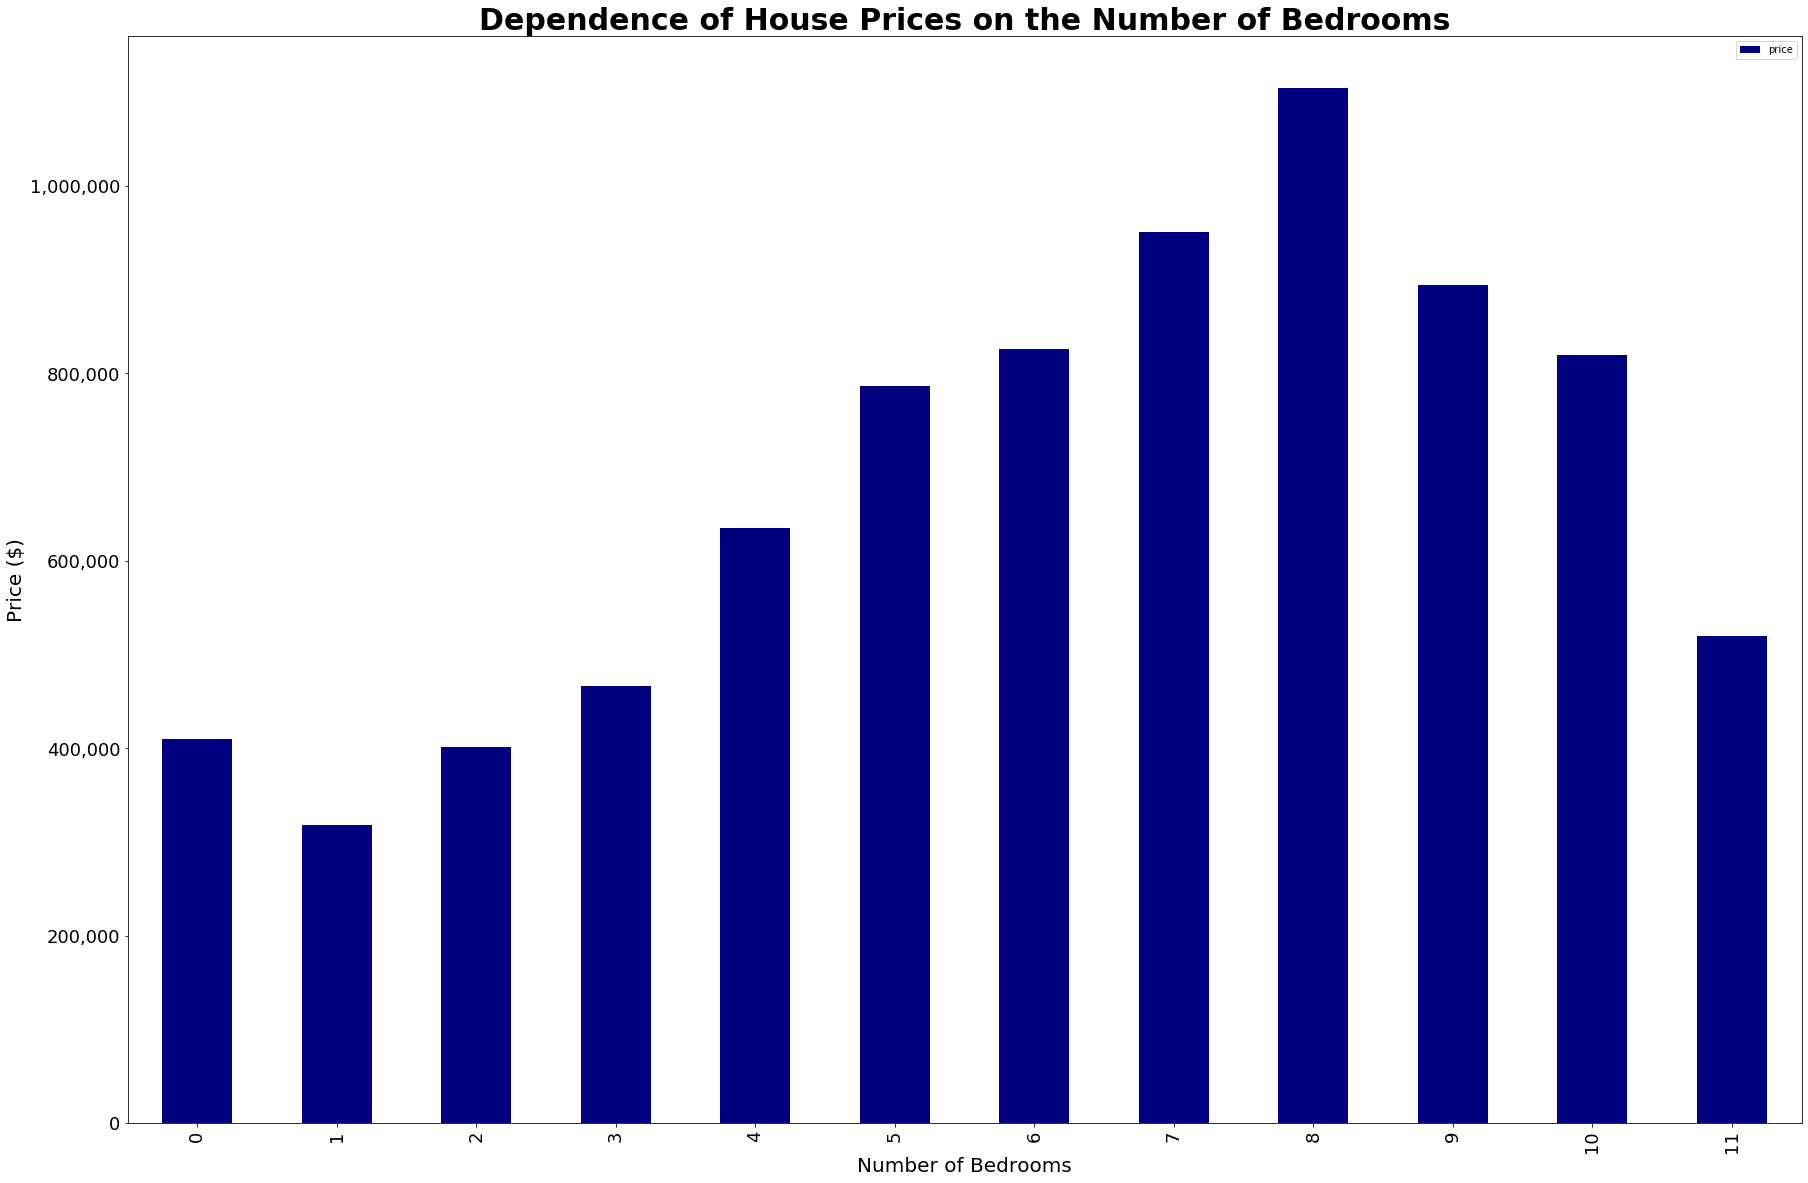

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [18]:
#Plotting the average price of the houses against the number of bedrooms

ax=bedroomdf.plot(kind='bar', y='price', color='navy')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Bedrooms", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Bedrooms", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvsbedrooms.png')

In [34]:
#Looking into the properties with no bedrooms to address the bias
nobedroom = df1.loc[df1['bedrooms']== 0]
nobedroom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date(Y/M)
875,6306400140,2014-06-12,1100000.0,0,0.00,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014-06
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015-02
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,2014-08
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,390,0,1953,0,98118,47.5260,-122.261,2170,6000,2014-10
6994,2954400190,2014-06-24,1300000.0,0,0.00,4810,28008,2.0,0,0,...,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014-06
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2014-11
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2014-09
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015-04
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014-12
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,2015-02


# Dependence of the House Prices on the Living Area Square Footage

##### As it can be observed from the scatter plot there a direct and linear correlation between the average house prices and the square footage of their living area. The more the living area square footage the higher the price. 

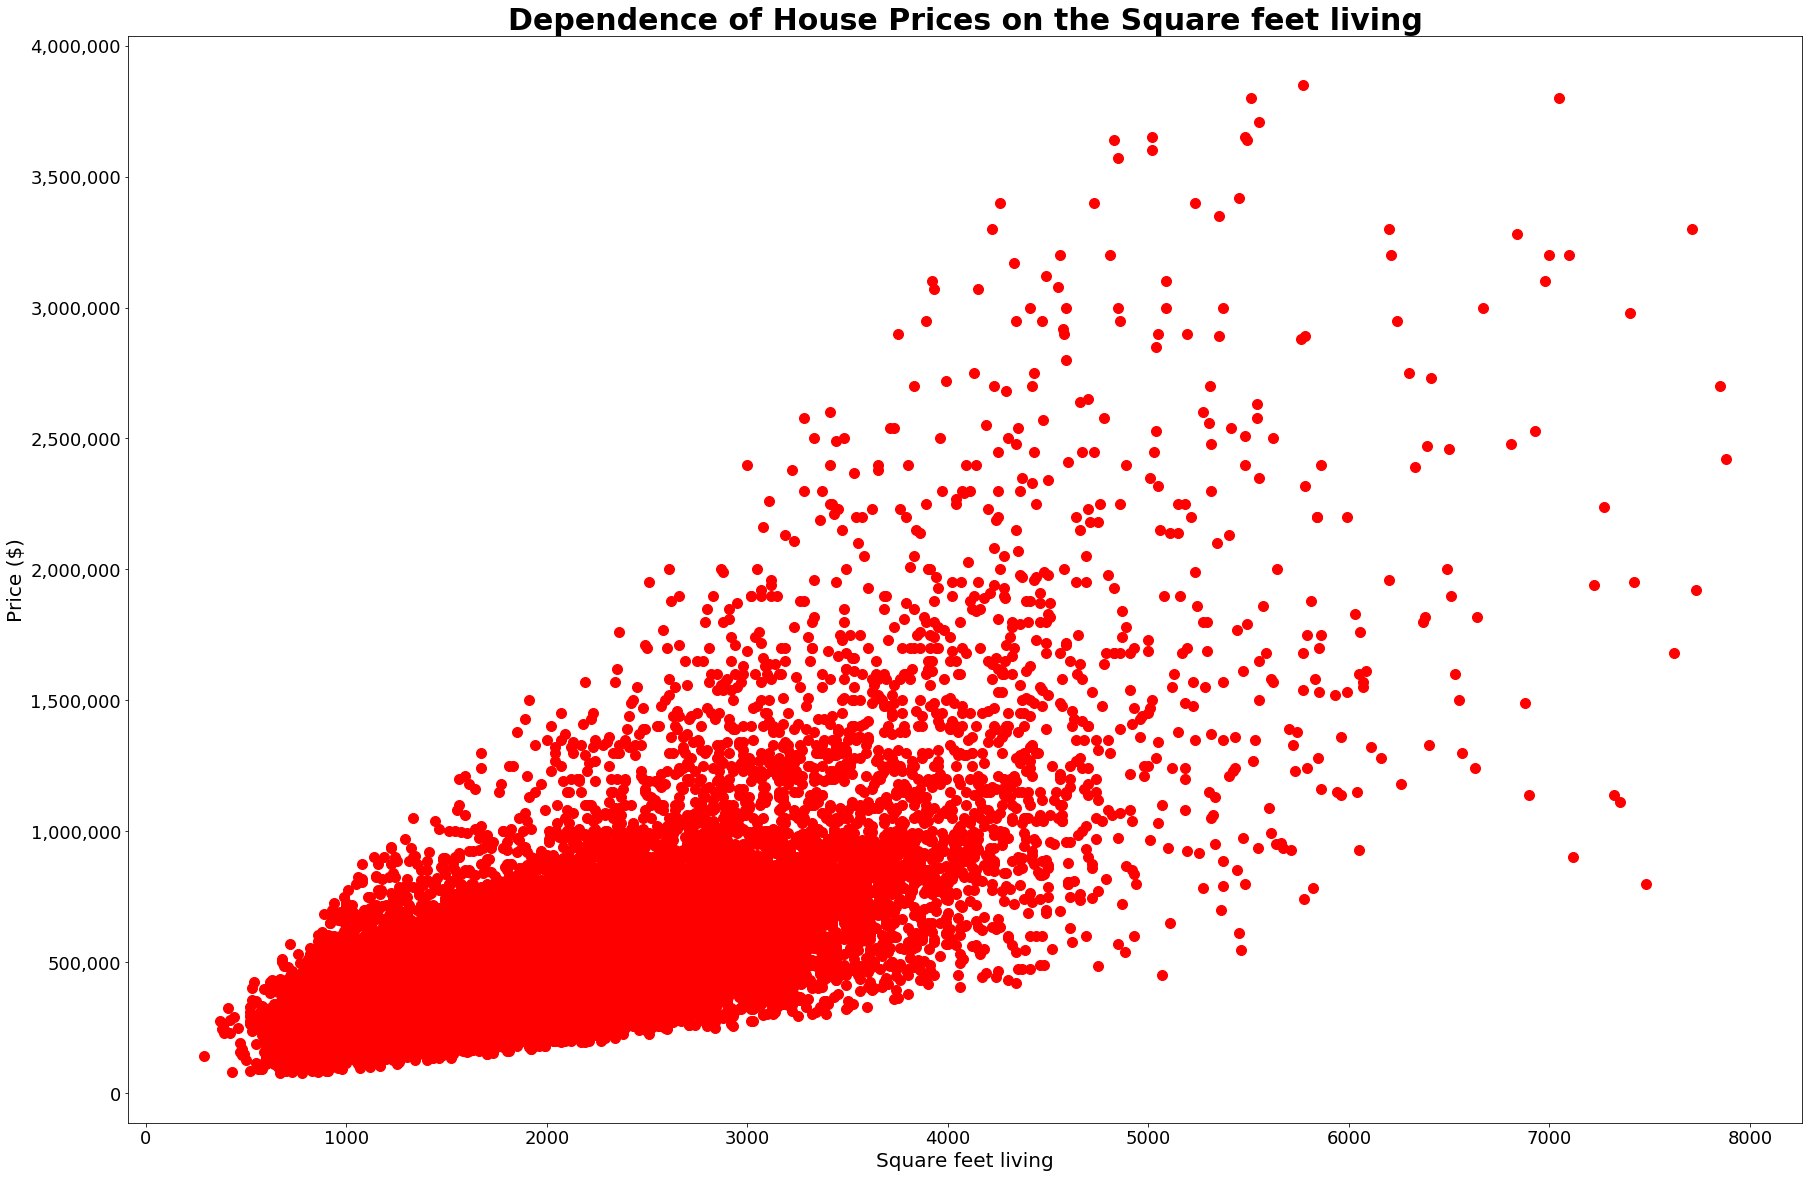

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [35]:
#Investigating the dependence of the price on the square feet of living area. The houses with prices over 4000,000$ and the square footage over 8000 sqf have been removed to eleminate the bias
nopricebias=df1.loc[df1['price']<4000000]
sqfnobias=nopricebias.loc[nopricebias['sqft_living']<8000]
ax=sqfnobias.plot(kind='scatter', x='sqft_living', y='price', c='red',s=100)
x_lim = len(sqfnobias.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet living", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet living", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftliving.png')

# Dependence of the House Prices on the Basement Square Footage 

##### It can be seen from the graph below that houses with no basement have prices in a large range which is probabily due to their location, size or condition. However in the case of houses with basements, there is a clear correlation between the square footage of the base ment and the average prices of the houses. The bigger the basement, the higher the price. In some cases this correlation seems to be stronger and in some cases it is weeker. 

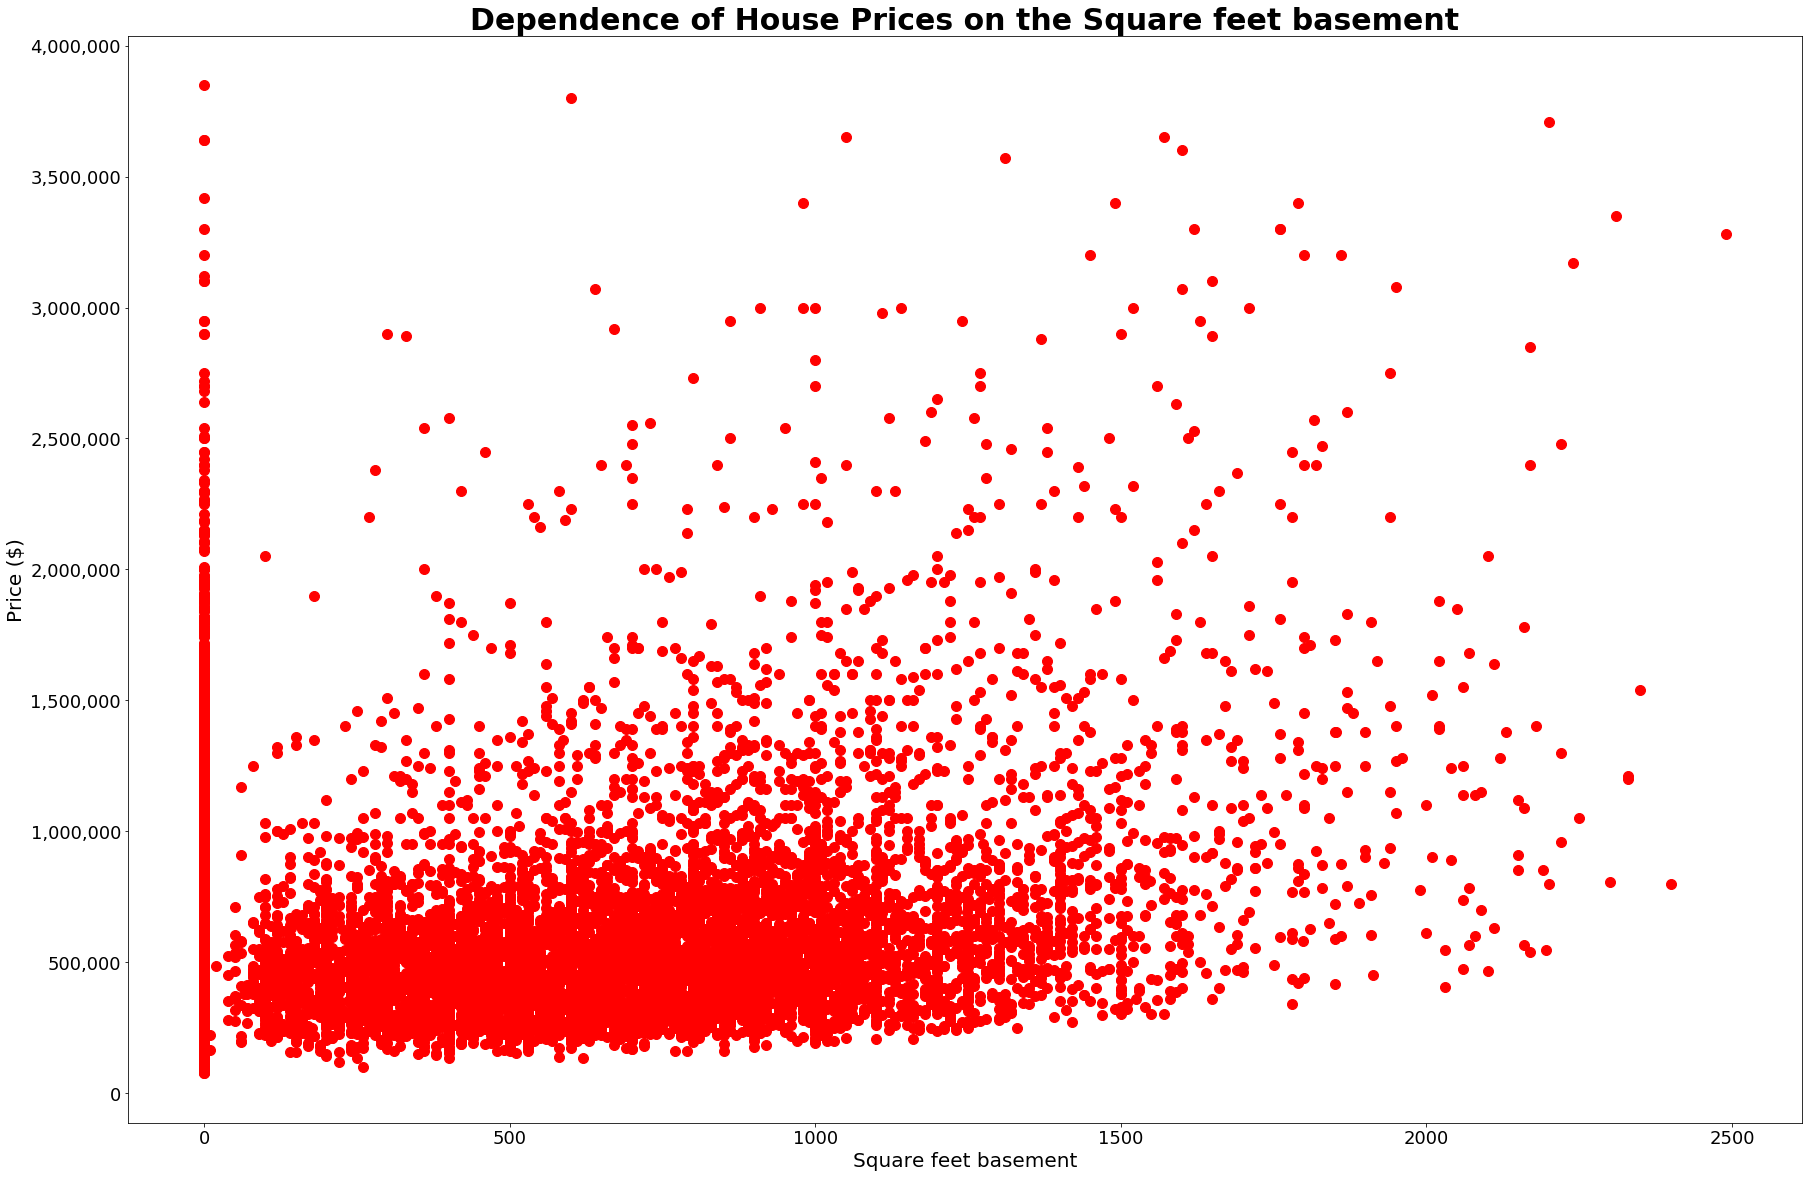

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [36]:
#Investigating the dependence of the price on the square feet of basement. Here in addition to eleminating prices above 4000,000 and sqf above 8000 sqf, the basement sqf above 2500 also has been removed to eleminate the bias.
bsmentnobias=nopricebias.loc[nopricebias['sqft_basement']<2500]
ax=bsmentnobias.plot(kind='scatter', x='sqft_basement', y='price', c='red',s=100)
x_lim = len(bsmentnobias.index)
# Chart title
plt.title("Dependence of House Prices on the Square feet basement", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Square feet basement", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftbasement.png')

In [37]:
#Investigation of the house prices on the basis of number of floors
floordf=df1.groupby('floors').mean()
floordf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,
1.0,4.517639e+09,4.422011e+05,3.157880,1.751522,1731.856635,14569.207791,0.005338,0.213597,3.550707,7.148984,1331.224459,400.632175,1960.402098,73.978650,98081.167993,47.555717,-122.234604,1777.832569,12549.418953
1.5,4.549761e+09,5.590449e+05,3.506283,1.771728,1907.880628,16966.476440,0.010995,0.249738,3.689529,7.192670,1646.653403,261.227225,1935.107330,143.146597,98102.585340,47.590323,-122.274702,1761.948691,13203.650785
2.0,4.677829e+09,6.490515e+05,3.631234,2.622619,2571.279092,16133.744448,0.009101,0.248149,3.187841,8.360272,2398.800631,172.478461,1990.720908,86.009586,98065.350443,47.550779,-122.163837,2330.476398,13575.054969
2.5,4.578060e+09,1.061021e+06,3.987578,2.835404,3145.428571,17347.291925,0.012422,0.509317,3.478261,8.894410,2789.857143,355.571429,1961.310559,223.503106,98092.503106,47.586585,-122.243913,2349.745342,17118.993789
3.0,4.475630e+09,5.826201e+05,2.952692,2.489804,1788.311582,4461.562806,0.013051,0.285481,3.035889,8.161501,1719.391517,68.920065,2004.846656,26.050571,98109.918434,47.657718,-122.327075,1605.885808,3388.778140
3.5,3.390713e+09,9.339375e+05,3.000000,2.531250,2518.000000,3038.750000,0.000000,0.500000,3.250000,8.375000,2315.500000,202.500000,1990.625000,0.000000,98106.625000,47.639900,-122.330875,1882.500000,2525.875000


# Dependence of the House Prices on the Number of Floors

##### The graph below shows there is a direct correlation between the number of floors and the average huse prices. For houses with between 1 and 2.5 floors, the price iincreases with increasing number of floors. For houses with 3 and 3.5 floors, their prices is lower than 2.5 floor houses and this can be due to their location and condition. 

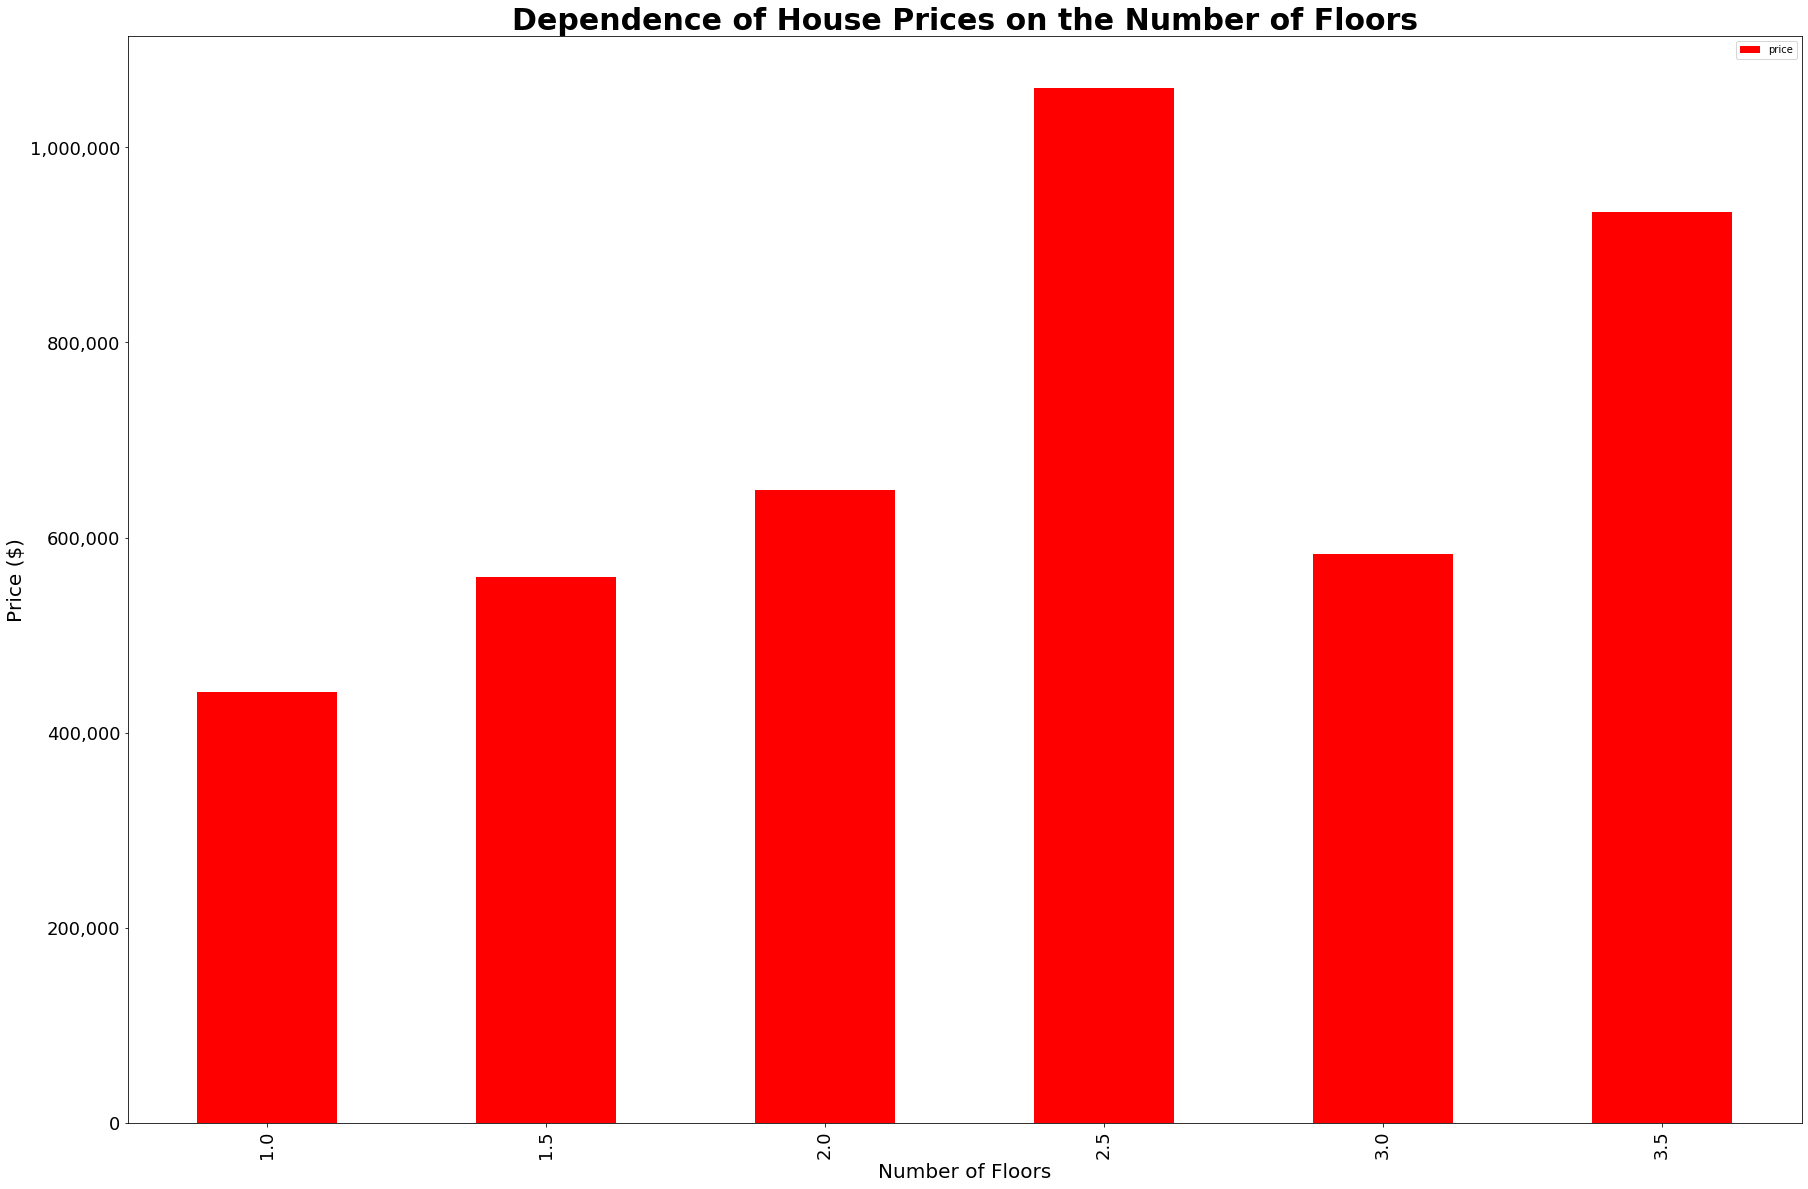

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [46]:
#Plotting average house prices against the number of floors
ax=floordf.plot(kind='bar', y='price', color='red')
x_lim = len(df.index)
# Chart title
plt.title("Dependence of House Prices on the Number of Floors", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Number of Floors", fontdict = {'fontsize': 20})
# y label
plt.ylabel('Price ($)', fontdict = {'fontsize': 20})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesvssqrftfloors.png')

In [47]:
#Obtaing date as year and month
datey=[]
num1 = 0
for index, row in df.iterrows():
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


In [48]:
#Inserting date as year and month
df['date(Y)']=datey

In [49]:
#Obtaining house sales by year and month and day
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-05-02,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.0,0.223881,3.447761,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.0,0.000000,3.500000,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.0,0.400000,3.400000,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.0,0.202381,3.440476,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.0,0.120482,3.349398,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,4.625505e+09,5.116239e+05,3.193548,2.088710,1922.322581,8165.096774,1.403226,0.0,0.032258,3.387097,7.548387,1673.096774,249.225806,1969.838710,64.322581,98076.774194,47.528861,-122.244194,1927.806452,8278.774194
2015-05-14,6.159145e+09,6.038908e+05,3.818182,2.340909,2093.909091,9393.363636,1.590909,0.0,0.090909,3.181818,7.909091,1919.363636,174.545455,1986.454545,0.000000,98083.818182,47.507082,-122.251182,2121.727273,7709.181818
2015-05-15,7.923600e+09,4.500000e+05,5.000000,2.000000,1870.000000,7344.000000,1.500000,0.0,0.000000,3.000000,7.000000,1870.000000,0.000000,1960.000000,0.000000,98007.000000,47.595100,-122.144000,1870.000000,7650.000000


In [50]:
#Obtaining house sales by year and month
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date(Y/M),,,,,,,,,,,,,,,,,,,,
2014-05,4.628282e+09,548166.600113,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,7.724548,1797.126131,317.786765,1970.536765,118.639706,98079.101244,47.570395,-122.215372,2003.056561,12935.194005
2014-06,4.573257e+09,558123.736239,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780
2014-07,4.578350e+09,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
2014-08,4.616929e+09,536527.039691,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,98077.058247,47.564831,-122.209811,1995.676289,12960.812887
2014-09,4.458143e+09,529315.868095,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,98078.445885,47.560565,-122.212648,1982.601466,11894.253100
2014-10,4.525103e+09,539127.477636,3.360490,2.118876,2083.896166,15489.720980,1.502929,0.008520,0.244409,3.411076,7.640043,1787.299255,296.596912,1970.119808,94.473376,98078.614483,47.562153,-122.217433,1981.560703,12989.555911
2014-11,4.523550e+09,522058.861800,3.333806,2.079376,2048.768958,15258.856130,1.500709,0.010631,0.221120,3.401843,7.610914,1775.916371,272.852587,1970.090716,87.574061,98078.540043,47.557782,-122.218147,1940.676825,12954.836286
2014-12,4.559764e+09,524602.893270,3.390891,2.102991,2091.339225,15330.740313,1.487084,0.008158,0.216859,3.394969,7.657376,1787.078858,304.260367,1971.276003,77.410605,98077.550646,47.559581,-122.220801,1976.046907,13091.547247
2015-01,4.574031e+09,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585


In [51]:
#Obtaining house sales by year
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date(Y),,,,,,,,,,,,,,,,,,,,
2014,4.560180e+09,539280.460739,3.377161,2.128904,2098.319073,14950.534272,1.502631,0.007791,0.233582,3.429919,7.681542,1802.015240,296.303834,1970.933985,90.978883,98077.895852,47.562848,-122.213923,1996.840498,12770.057473
2015,4.622485e+09,542072.495129,3.357593,2.085100,2041.285100,15434.917192,1.476862,0.007020,0.235817,3.366476,7.605158,1759.827937,281.457163,1971.154298,70.614900,98078.031948,47.554192,-122.213841,1964.984527,12765.097564


In [52]:
#Obtaing house sales by date and zipcode
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
...                          ...           ...       ...        ...   
98199   2015-05-04  6.179968e+09  5.820000e+05  3.333333   1.833333   
        2015-05-05  1.370801e+09  1.220000e+06  3.000000   3.250000   
        2015-05-07  6.821102e+09  6.800000e+05  2.000000   1.000000   
        2015-05-08  6.822101e+09  7.000000e+05  3.000000   1.750000   
        2015-05-09  8.710004e+08  8.120000e+05  4.000000   2.000000   

                    sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date                                                                    
98001   2014-05-02  2200.000000   9397.000000  2.000000         0.0  0.000000   
        2014-05-05  1705.000000   9715.500000  1.000000         0.0  0.000000   
        2014-05-06  2185.000000  13251.500000  1.000000         0.0  0.000000   
        2014-05-07  1722.000000  15822.000000  1.666667         0.0  0.000000   
        2014-05-08  1705.000000  11118.000000  1.500000         0.0  0.000000   
...                         ...           ...       ...         ...       ...   
98199   2015-05-04  1613.333333   4181.666667  1.333333         0.0  0.666667   
        2015-05-05  3960.000000   6132.000000  2.000000         0.0  3.000000   
        2015-05-07  2140.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-08  1500.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-09  2380.000000   6122.000000  1.000000         0.0  2.000000   

                    condition      grade   sqft_above  sqft_basement  \
zipcode date                                                           
98001   2014-05-02   3.000000   8.000000  2200.000000            0.0   
        2014-05-05   3.500000   7.000000  1245.000000          460.0   
        2014-05-06   4.500000   7.500000  1870.000000          315.0   
        2014-05-07   3.000000   7.333333  1722.000000            0.0   
        2014-05-08   3.500000   6.500000  1705.000000            0.0   
...                       ...        ...          ...            ...   
98199   2015-05-04   3.333333   7.333333  1363.333333          250.0   
        2015-05-05   3.000000  10.000000  2600.000000         1360.0   
        2015-05-07   4.000000   7.000000  1070.000000         1070.0   
        2015-05-08   5.000000   7.000000   850.000000          650.0   
        2015-05-09   4.000000   8.000000  1310.000000         1070.0   

                       yr_built  yr_renovated        lat        long  \
zipcode date                                                           
98001   2014-05-02  1987.000000           0.0  47.340600 -122.269000   
        2014-05-05  1973.000000           0.0  47.319700 -122.275500   
        2014-05-06  1970.500000           0.0  47.325300 -122.279500   
        2014-05-07  1990.000000           0.0  47.308067 -122.264333   
        2014-05-08  1981.000000           0.0  47.284700 -122.249000   
...                         ...           ...        ...         ...   
98199   2015-05-04  1951.666667           0.0  47.642200 -122.392000   
        2015-05-05  1933.000000           0.0  47.639600 -122.409000   
        2015-05-07  1946.000000           0.0  47.651000 -122.399000   
        2015-05-08  1940.000000           0.0  47.647400 -122.402000   
        2015-05-09  1949.000000           0.0  47.650600 -122.405000   

                    sqft_living15    sqft_lot15  
zipcode date                                     
98001   2014-05-02    2310.000000   9176.000000  
        2014-05-05    2174.0

In [53]:
#Obtaining house sales by date (year and month) and zipcode
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [54]:
#Obtaining house sales by date (year) and zipcode
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

# Dependence of the House Prices on the Zipcode

##### The graph here shows the dependence of average house prices on the zipcode. Obviously location plays a significant role in the price of a house.

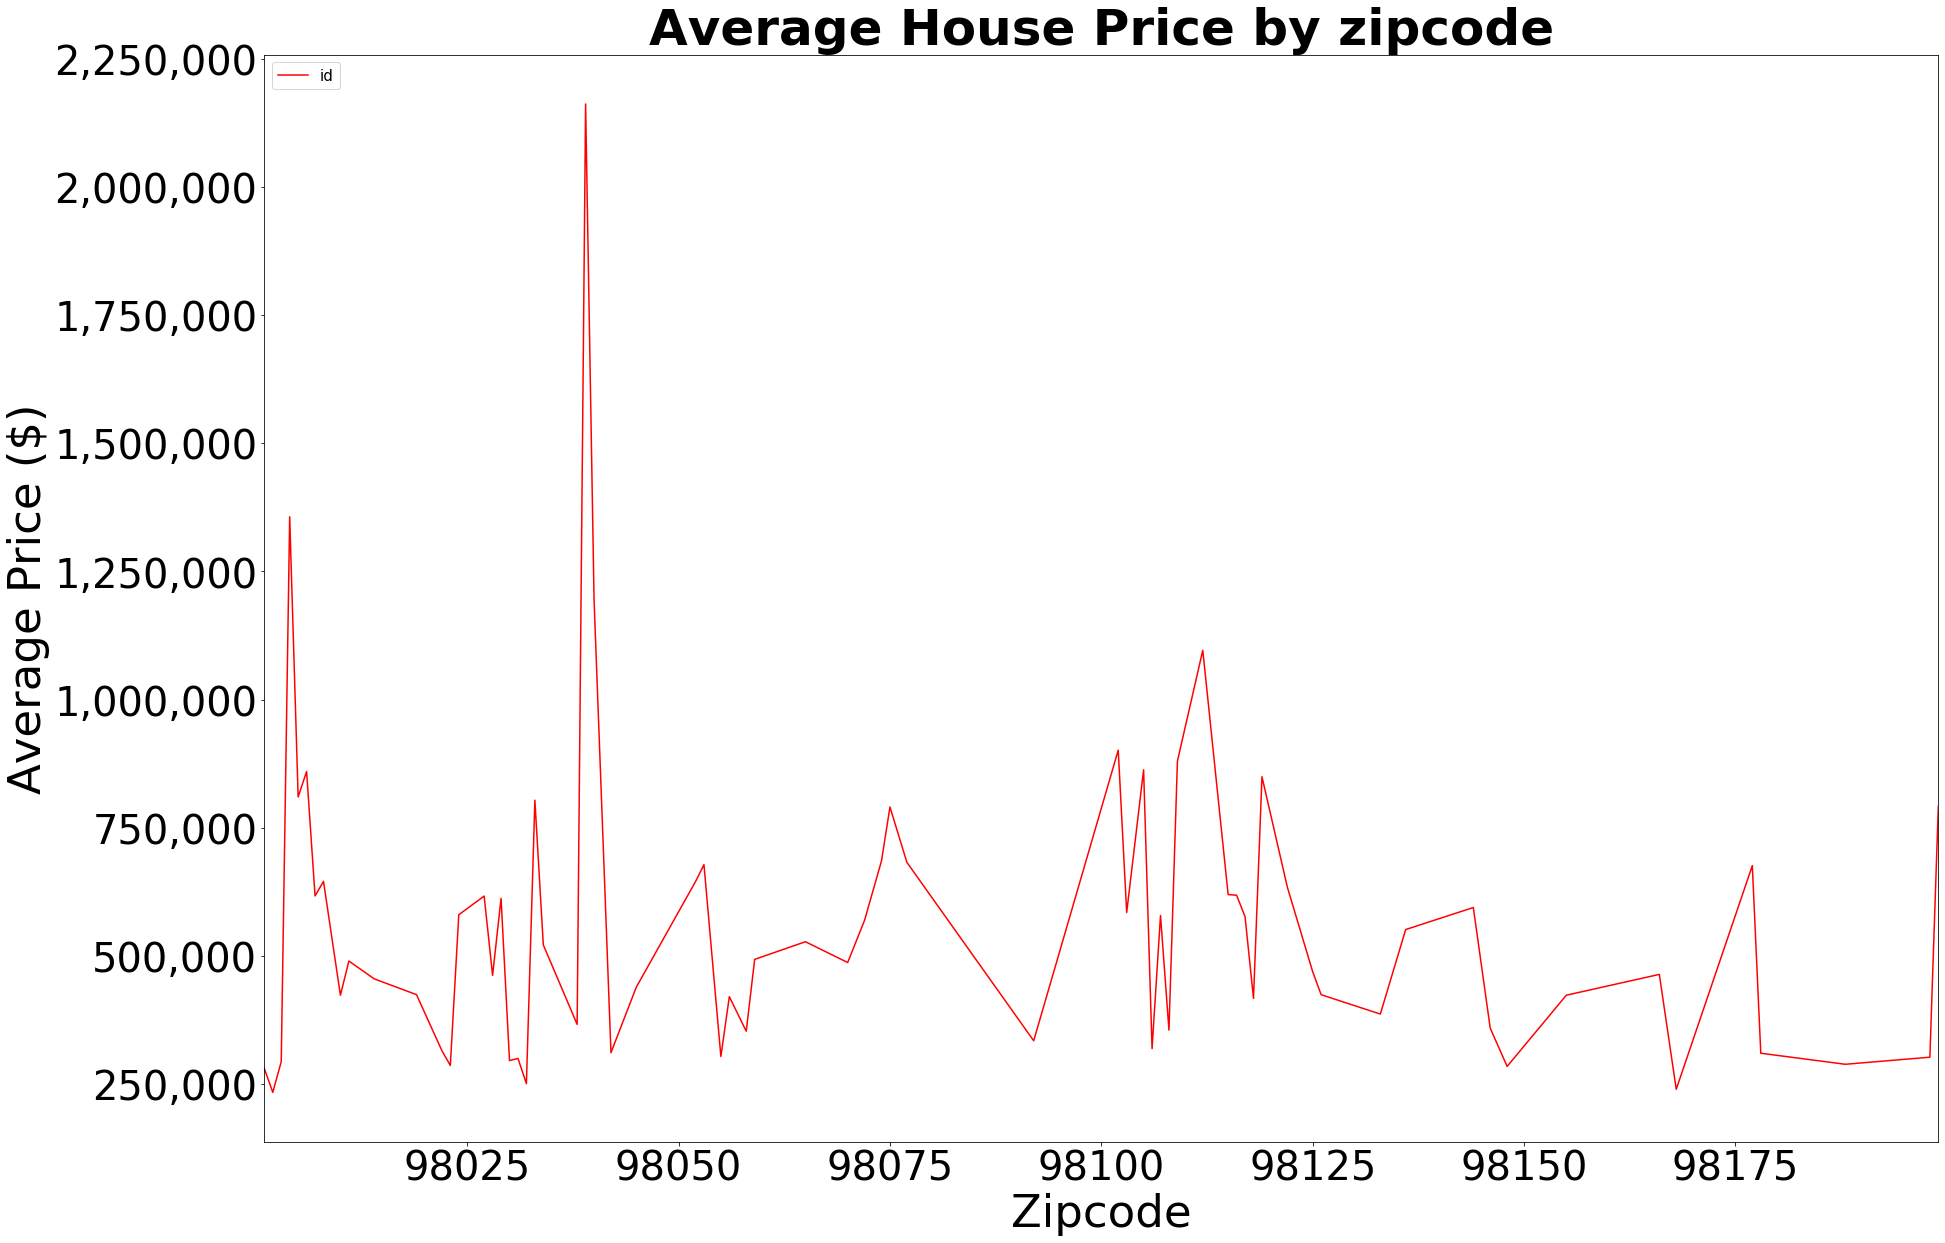

Current size: [30.0, 20.0]


<Figure size 6480x2880 with 0 Axes>

In [55]:
#Plotting the house prices against zipcodes
byzipcode=df.groupby('zipcode').mean()

ax=byzipcode.plot(kind='line', y='price', color='red')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price by zipcode", fontdict = {'fontsize': 50, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode", fontdict = {'fontsize': 45})
# y label
plt.ylabel("Average Price ($)", fontdict = {'fontsize': 45})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=40)
plt.show()

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodeoverall.png')

In [57]:
#reading the weather data which is in the form of a json file
weatherdata = pd.read_json('../Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow
0,5799783,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...","{'speed': 1, 'deg': 350}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1356998400,2013-01-01 00:00:00 +0000 UTC,NaN,NaN
1,5799783,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1357002000,2013-01-01 01:00:00 +0000 UTC,NaN,NaN
2,5799783,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1357005600,2013-01-01 02:00:00 +0000 UTC,NaN,NaN
3,5799783,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357009200,2013-01-01 03:00:00 +0000 UTC,NaN,NaN
4,5799783,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357012800,2013-01-01 04:00:00 +0000 UTC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26272,5799783,"{'temp': 275.5, 'temp_min': 272.15, 'temp_max'...","{'speed': 1, 'deg': 98}",{'all': 1},"[{'id': 500, 'main': 'Rain', 'description': 'l...",1451592000,2015-12-31 20:00:00 +0000 UTC,{'1h': 0.30000000000000004},NaN
26273,5799783,"{'temp': 277.2, 'temp_min': 275.15, 'temp_max'...","{'speed': 2, 'deg': 330}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451595600,2015-12-31 21:00:00 +0000 UTC,NaN,NaN
26274,5799783,"{'temp': 277.525, 'temp_min': 277.525, 'temp_m...","{'speed': 1, 'deg': 210}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451599200,2015-12-31 22:00:00 +0000 UTC,NaN,NaN
26275,5799783,"{'temp': 277.85, 'temp_min': 276.55, 'temp_max...","{'speed': 0, 'deg': 90}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451602800,2015-12-31 23:00:00 +0000 UTC,NaN,NaN


In [58]:
#Normalizing the date with the house sales dataset
date=[]
num = 0
for index, row in weatherdata.iterrows():
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

In [27]:
weatherdata['date']= date
weatherdata

,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow,date
0,5799783,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...","{'speed': 1, 'deg': 350}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1356998400,2013-01-01 00:00:00 +0000 UTC,NaN,NaN,2013-01-01
1,5799783,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1357002000,2013-01-01 01:00:00 +0000 UTC,NaN,NaN,2013-01-01
2,5799783,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1357005600,2013-01-01 02:00:00 +0000 UTC,NaN,NaN,2013-01-01
3,5799783,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357009200,2013-01-01 03:00:00 +0000 UTC,NaN,NaN,2013-01-01
4,5799783,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357012800,2013-01-01 04:00:00 +0000 UTC,NaN,NaN,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
26272,5799783,"{'temp': 275.5, 'temp_min': 272.15, 'temp_max'...","{'speed': 1, 'deg': 98}",{'all': 1},"[{'id': 500, 'main': 'Rain', 'description': 'l...",1451592000,2015-12-31 20:00:00 +0000 UTC,{'1h': 0.30000000000000004},NaN,2015-12-31
26273,5799783,"{'temp': 277.2, 'temp_min': 275.15, 'temp_max'...","{'speed': 2, 'deg': 330}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451595600,2015-12-31 21:00:00 +0000 UTC,NaN,NaN,2015-12-31
26274,5799783,"{'temp': 277.525, 'temp_min': 277.525, 'temp_m...","{'speed': 1, 'deg': 210}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451599200,2015-12-31 22:00:00 +0000 UTC,NaN,NaN,2015-12-31
26275,5799783,"{'temp': 277.85, 'temp_min': 276.55, 'temp_max...","{'speed': 0, 'deg': 90}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451602800,2015-12-31 23:00:00 +0000 UTC,NaN,NaN,2015-12-31


In [28]:
weatherdata.sort_values('date')


,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow,date
0,5799783,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...","{'speed': 1, 'deg': 350}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1356998400,2013-01-01 00:00:00 +0000 UTC,NaN,NaN,2013-01-01
23,5799783,"{'temp': 276.67, 'temp_min': 275.37, 'temp_max...","{'speed': 1, 'deg': 320}",{'all': 90},"[{'id': 804, 'main': 'Clouds', 'description': ...",1357081200,2013-01-01 23:00:00 +0000 UTC,NaN,NaN,2013-01-01
22,5799783,"{'temp': 275.94, 'temp_min': 270.93, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 803, 'main': 'Clouds', 'description': ...",1357077600,2013-01-01 22:00:00 +0000 UTC,NaN,NaN,2013-01-01
21,5799783,"{'temp': 275.66, 'temp_min': 272.04, 'temp_max...","{'speed': 1, 'deg': 290}",{'all': 90},"[{'id': 804, 'main': 'Clouds', 'description': ...",1357074000,2013-01-01 21:00:00 +0000 UTC,NaN,NaN,2013-01-01
20,5799783,"{'temp': 275.39, 'temp_min': 272.04, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1357070400,2013-01-01 20:00:00 +0000 UTC,NaN,NaN,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
26253,5799783,"{'temp': 273.1445, 'temp_min': 273.1445, 'temp...","{'speed': 0, 'deg': 85}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1451523600,2015-12-31 01:00:00 +0000 UTC,{'3h': 0},{'3h': 0},2015-12-31
26252,5799783,"{'temp': 277.51, 'temp_min': 275.15, 'temp_max...","{'speed': 0, 'deg': 86}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451520000,2015-12-31 00:00:00 +0000 UTC,NaN,NaN,2015-12-31
26275,5799783,"{'temp': 277.85, 'temp_min': 276.55, 'temp_max...","{'speed': 0, 'deg': 90}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451602800,2015-12-31 23:00:00 +0000 UTC,NaN,NaN,2015-12-31
26263,5799783,"{'temp': 270.22, 'temp_min': 266.15, 'temp_max...","{'speed': 0, 'deg': 96}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451559600,2015-12-31 11:00:00 +0000 UTC,NaN,NaN,2015-12-31


In [29]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

In [30]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow,date,Temperature,Humidity,Cloudliness,Weather Condition,Wind Speed
0,5799783,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...","{'speed': 1, 'deg': 350}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1356998400,2013-01-01 00:00:00 +0000 UTC,NaN,NaN,2013-01-01,275.620,93,1,Clear,1
1,5799783,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1357002000,2013-01-01 01:00:00 +0000 UTC,NaN,NaN,2013-01-01,275.610,93,1,Clear,0
2,5799783,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1357005600,2013-01-01 02:00:00 +0000 UTC,NaN,NaN,2013-01-01,274.230,93,20,Clouds,0
3,5799783,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357009200,2013-01-01 03:00:00 +0000 UTC,NaN,NaN,2013-01-01,273.950,0,1,Mist,0
4,5799783,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357012800,2013-01-01 04:00:00 +0000 UTC,NaN,NaN,2013-01-01,273.550,0,75,Mist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,5799783,"{'temp': 275.5, 'temp_min': 272.15, 'temp_max'...","{'speed': 1, 'deg': 98}",{'all': 1},"[{'id': 500, 'main': 'Rain', 'description': 'l...",1451592000,2015-12-31 20:00:00 +0000 UTC,{'1h': 0.30000000000000004},NaN,2015-12-31,275.500,74,1,Rain,1
26273,5799783,"{'temp': 277.2, 'temp_min': 275.15, 'temp_max'...","{'speed': 2, 'deg': 330}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451595600,2015-12-31 21:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.200,41,1,Clear,2
26274,5799783,"{'temp': 277.525, 'temp_min': 277.525, 'temp_m...","{'speed': 1, 'deg': 210}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451599200,2015-12-31 22:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.525,44,1,Clear,1
26275,5799783,"{'temp': 277.85, 'temp_min': 276.55, 'temp_max...","{'speed': 0, 'deg': 90}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451602800,2015-12-31 23:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.850,48,1,Clear,0


In [31]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

In [32]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow,date,Temperature,Humidity,Cloudliness,Weather Condition,Wind Speed,Temperature (C)
0,5799783,"{'temp': 275.62, 'temp_min': 271.48, 'temp_max...","{'speed': 1, 'deg': 350}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1356998400,2013-01-01 00:00:00 +0000 UTC,NaN,NaN,2013-01-01,275.620,93,1,Clear,1,2.470
1,5799783,"{'temp': 275.61, 'temp_min': 273.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1357002000,2013-01-01 01:00:00 +0000 UTC,NaN,NaN,2013-01-01,275.610,93,1,Clear,0,2.460
2,5799783,"{'temp': 274.23, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1357005600,2013-01-01 02:00:00 +0000 UTC,NaN,NaN,2013-01-01,274.230,93,20,Clouds,0,1.080
3,5799783,"{'temp': 273.95, 'temp_min': 270.37, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357009200,2013-01-01 03:00:00 +0000 UTC,NaN,NaN,2013-01-01,273.950,0,1,Mist,0,0.800
4,5799783,"{'temp': 273.55, 'temp_min': 269.82, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 701, 'main': 'Mist', 'description': 'm...",1357012800,2013-01-01 04:00:00 +0000 UTC,NaN,NaN,2013-01-01,273.550,0,75,Mist,0,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,5799783,"{'temp': 275.5, 'temp_min': 272.15, 'temp_max'...","{'speed': 1, 'deg': 98}",{'all': 1},"[{'id': 500, 'main': 'Rain', 'description': 'l...",1451592000,2015-12-31 20:00:00 +0000 UTC,{'1h': 0.30000000000000004},NaN,2015-12-31,275.500,74,1,Rain,1,2.350
26273,5799783,"{'temp': 277.2, 'temp_min': 275.15, 'temp_max'...","{'speed': 2, 'deg': 330}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451595600,2015-12-31 21:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.200,41,1,Clear,2,4.050
26274,5799783,"{'temp': 277.525, 'temp_min': 277.525, 'temp_m...","{'speed': 1, 'deg': 210}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451599200,2015-12-31 22:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.525,44,1,Clear,1,4.375
26275,5799783,"{'temp': 277.85, 'temp_min': 276.55, 'temp_max...","{'speed': 0, 'deg': 90}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1451602800,2015-12-31 23:00:00 +0000 UTC,NaN,NaN,2015-12-31,277.850,48,1,Clear,0,4.700


In [33]:
weatherdata = weatherdata[['date', 'Temperature (C)', 'Humidity', 'Cloudliness', 'Weather Condition', 'Wind Speed']]

In [34]:
weatherdata

,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed
0,2013-01-01,2.470,93,1,Clear,1
1,2013-01-01,2.460,93,1,Clear,0
2,2013-01-01,1.080,93,20,Clouds,0
3,2013-01-01,0.800,0,1,Mist,0
4,2013-01-01,0.400,0,75,Mist,0
...,...,...,...,...,...,...
26272,2015-12-31,2.350,74,1,Rain,1
26273,2015-12-31,4.050,41,1,Clear,2
26274,2015-12-31,4.375,44,1,Clear,1
26275,2015-12-31,4.700,48,1,Clear,0


In [35]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

,Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,
2013-01-01,0.619583,61.958333,33.416667,0.250000
2013-01-02,0.534167,77.500000,12.291667,1.000000
2013-01-03,0.463750,54.166667,22.708333,2.291667
2013-01-04,1.745833,57.125000,1.000000,1.458333
2013-01-05,3.907366,83.333333,84.375000,1.750000
...,...,...,...,...
2015-12-28,2.579458,94.666667,89.125000,0.875000
2015-12-29,2.798354,95.416667,87.041667,0.750000
2015-12-30,0.159417,92.916667,6.375000,0.333333


In [36]:
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [37]:
weatherdata['date(Y/M)']=wdateym
weatherdata

C:\Users\Kaveh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed,date(Y/M)
0,2013-01-01,2.470,93,1,Clear,1,2013-01
1,2013-01-01,2.460,93,1,Clear,0,2013-01
2,2013-01-01,1.080,93,20,Clouds,0,2013-01
3,2013-01-01,0.800,0,1,Mist,0,2013-01
4,2013-01-01,0.400,0,75,Mist,0,2013-01
...,...,...,...,...,...,...,...
26272,2015-12-31,2.350,74,1,Rain,1,2015-12
26273,2015-12-31,4.050,41,1,Clear,2,2015-12
26274,2015-12-31,4.375,44,1,Clear,1,2015-12
26275,2015-12-31,4.700,48,1,Clear,0,2015-12


In [38]:
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

,Temperature (C),Humidity,Cloudliness,Wind Speed
date(Y/M),,,,
2013-01,2.541290,76.581989,64.669355,1.198925
2013-02,6.016165,75.611607,76.558036,1.697917
2013-03,7.138878,66.061828,60.897849,1.041667
2013-04,9.459154,69.781944,58.947222,1.879167
2013-05,13.585724,52.876344,42.327957,1.248656
2013-06,16.259861,60.609722,49.747222,0.800000
2013-07,18.301708,57.524194,8.356183,0.666667
2013-08,17.912518,63.607527,39.805108,0.681452
2013-09,15.300842,80.112500,50.676389,1.115278


In [39]:
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

,Temperature (C),Humidity,Cloudliness,Wind Speed,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,16.163522,54.875000,18.208333,0.708333,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,...,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,10.194961,78.625000,82.208333,1.000000,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,...,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,8.960943,89.458333,91.625000,0.958333,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,...,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,10.799583,89.541667,88.333333,1.666667,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,...,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,11.157323,83.708333,38.125000,1.166667,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,...,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,8.864440,93.166667,88.250000,0.833333,4.625505e+09,5.116239e+05,3.193548,2.088710,1922.322581,8165.096774,...,7.548387,1673.096774,249.225806,1969.838710,64.322581,98076.774194,47.528861,-122.244194,1927.806452,8278.774194
2015-05-14,9.033814,91.416667,77.958333,0.375000,6.159145e+09,6.038908e+05,3.818182,2.340909,2093.909091,9393.363636,...,7.909091,1919.363636,174.545455,1986.454545,0.000000,98083.818182,47.507082,-122.251182,2121.727273,7709.181818
2015-05-15,10.121395,84.625000,57.375000,0.375000,7.923600e+09,4.500000e+05,5.000000,2.000000,1870.000000,7344.000000,...,7.000000,1870.000000,0.000000,1960.000000,0.000000,98007.000000,47.595100,-122.144000,1870.000000,7650.000000


In [40]:
wdf=mergedtable.loc[mergedtable['price']<1200000]

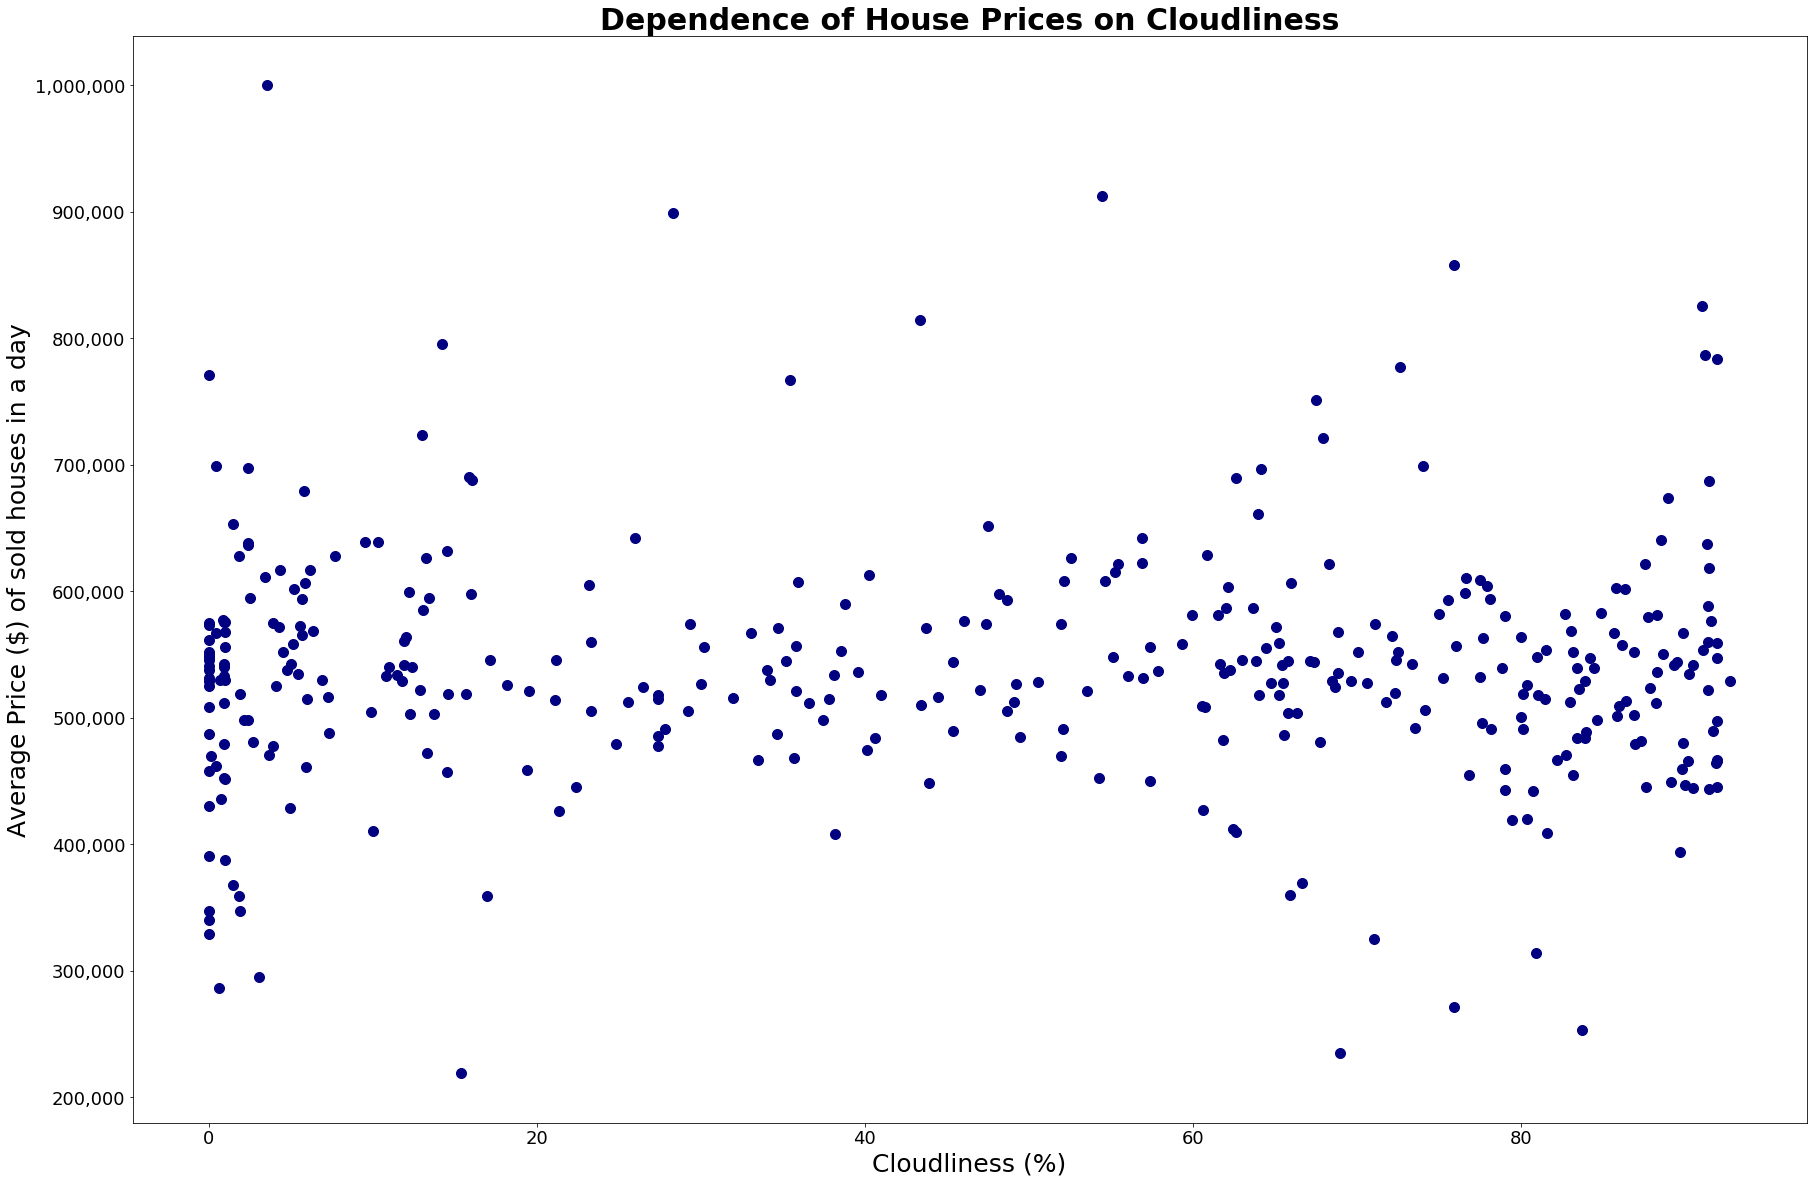

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [42]:
ax= wdf.plot(x='Cloudliness', y='price', kind='scatter', color='navy', s=100)
x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshouseprices.png')


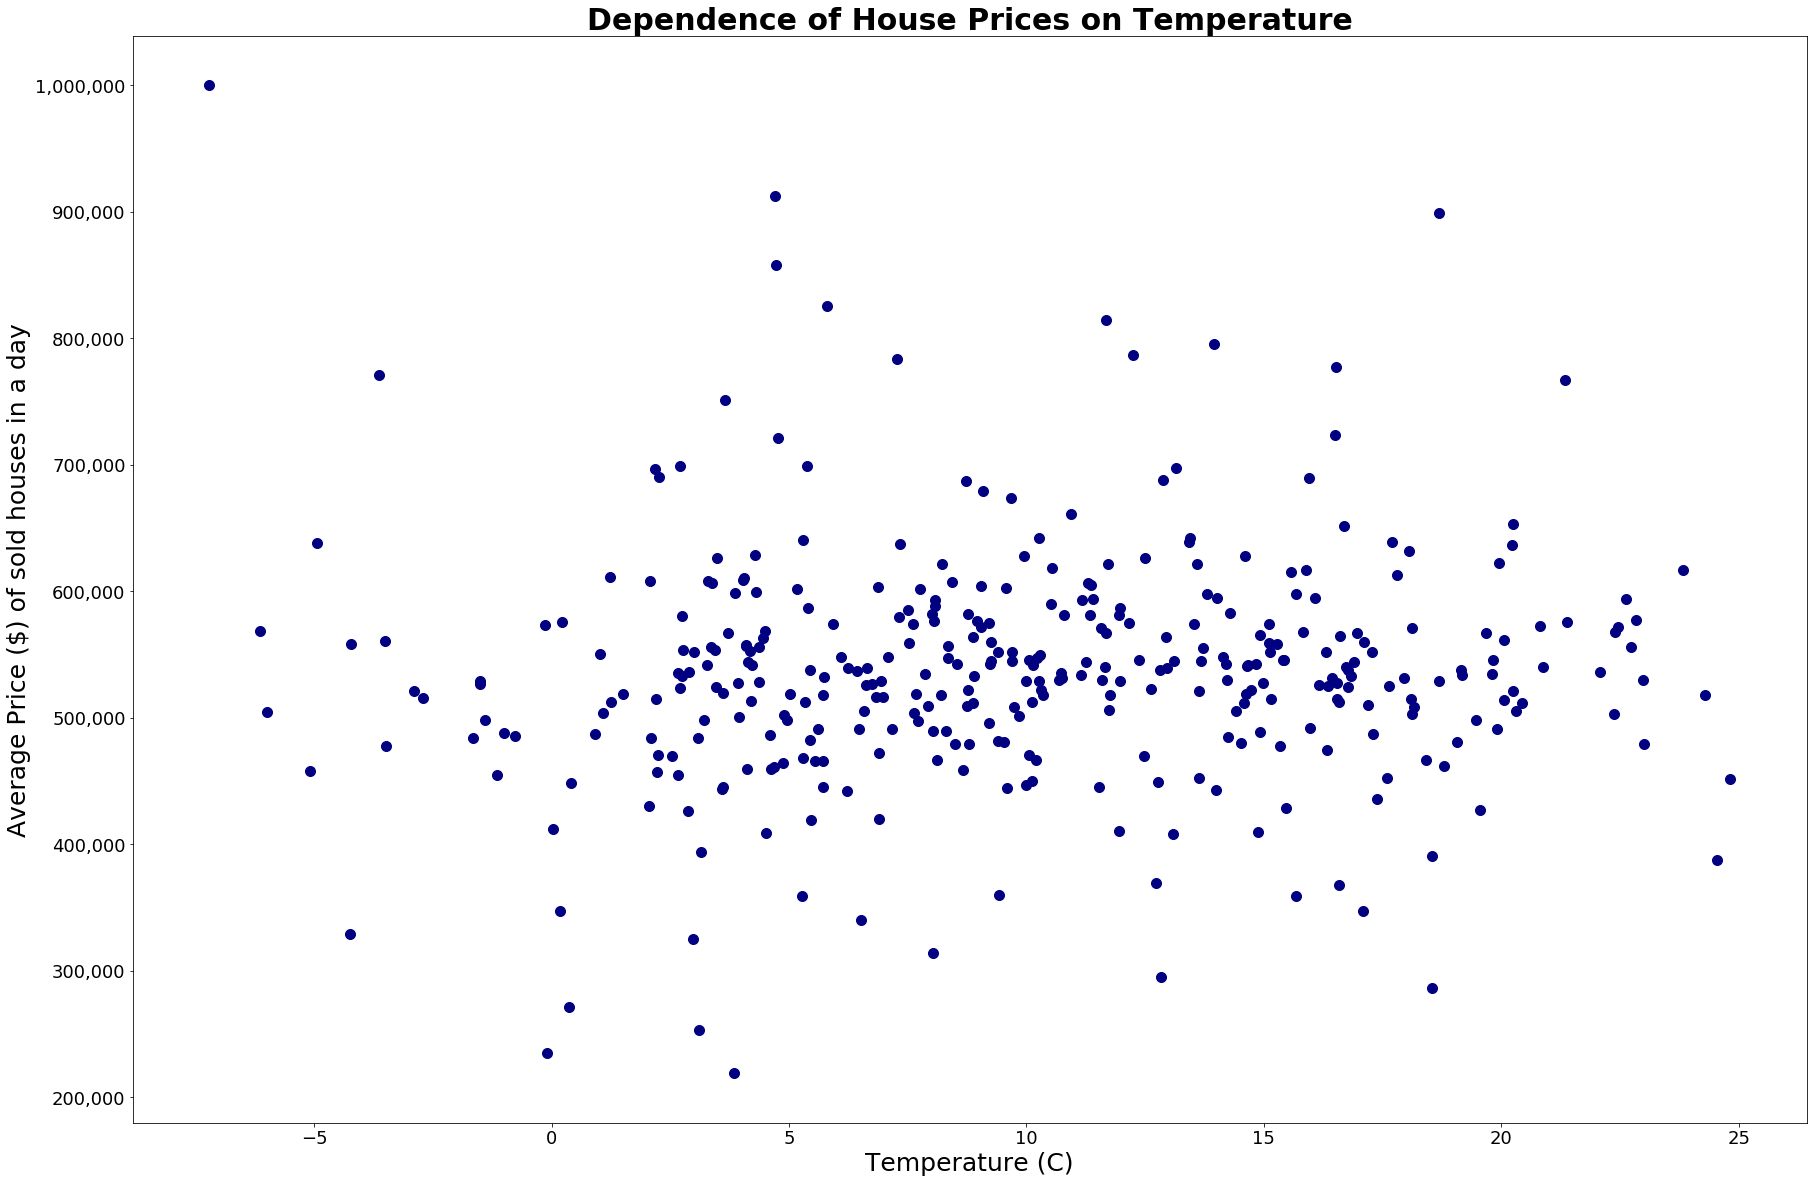

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [43]:
ax=wdf.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')


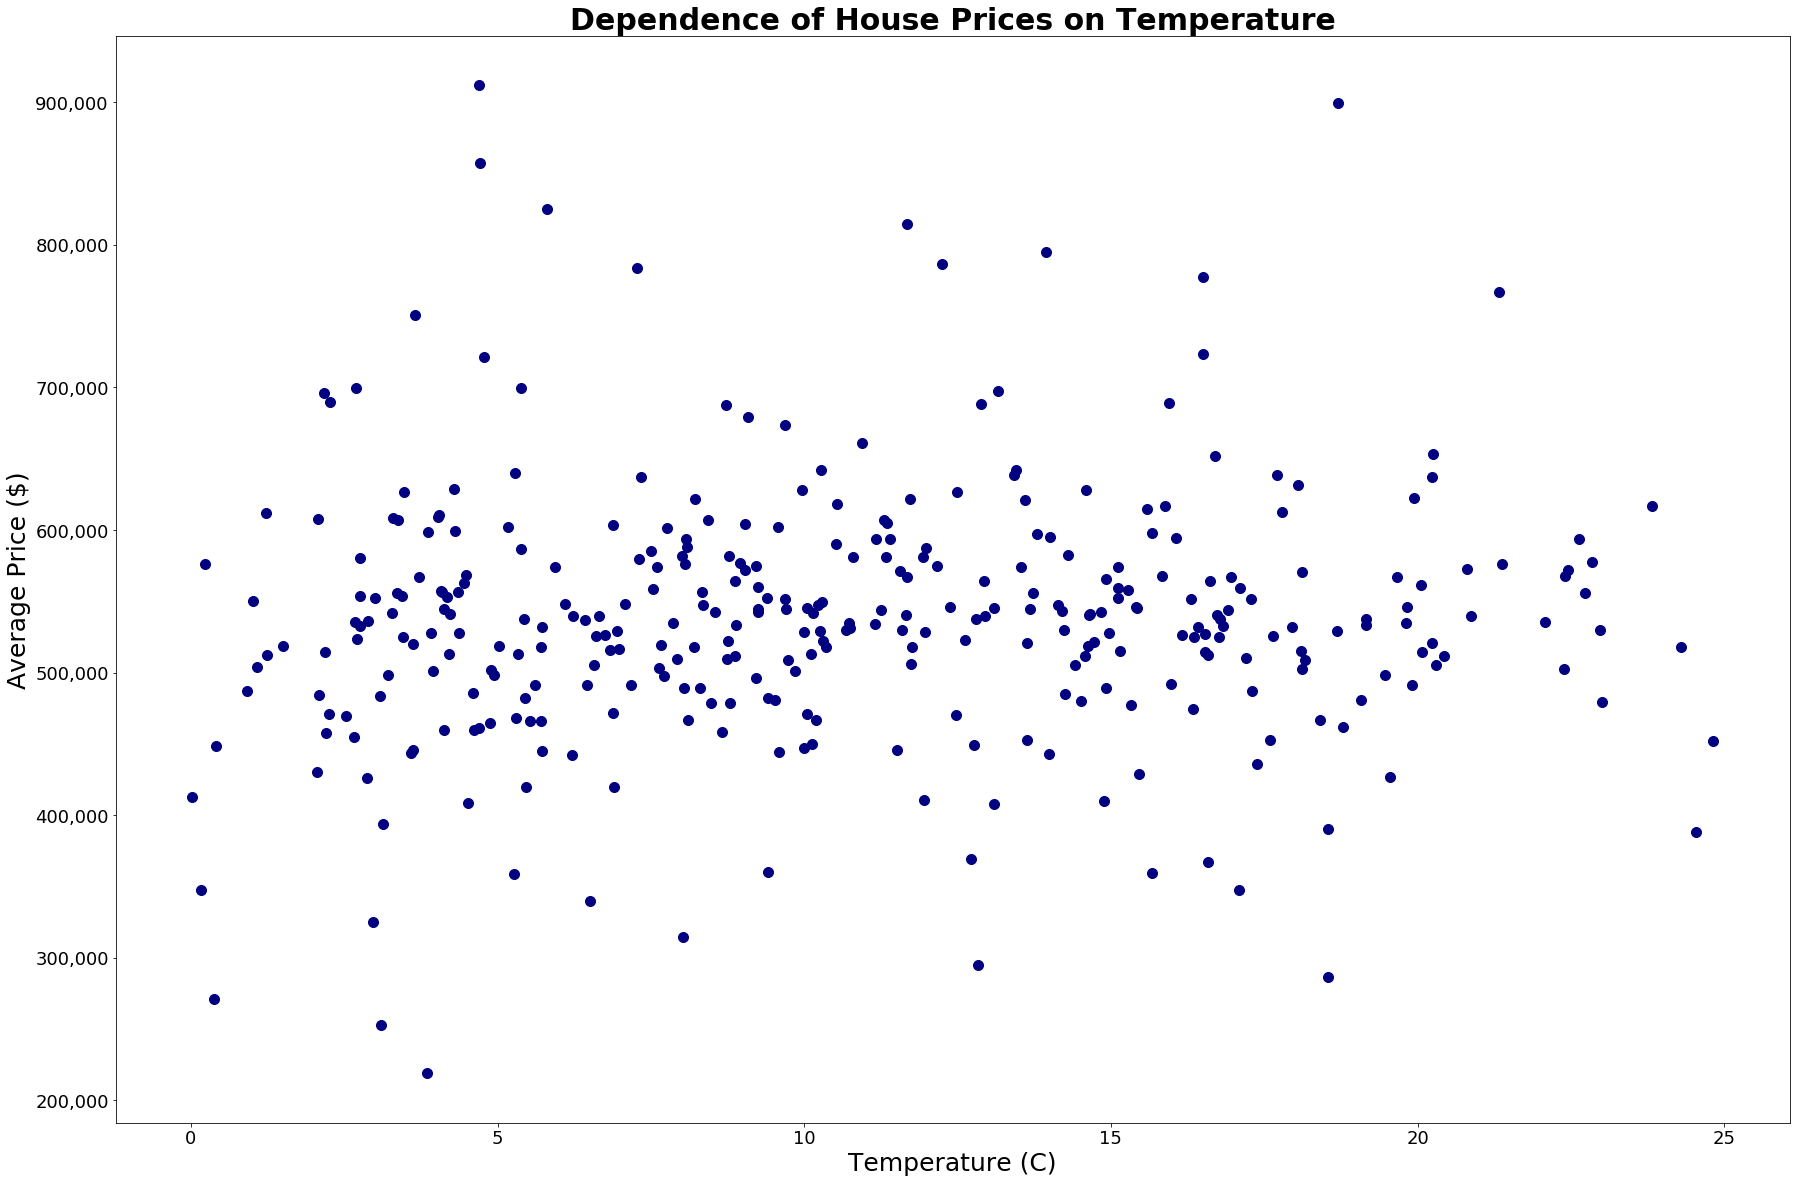

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [44]:
tempnobias=wdf.loc[wdf['Temperature (C)']>0]
ax=tempnobias.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(tempnobias.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')

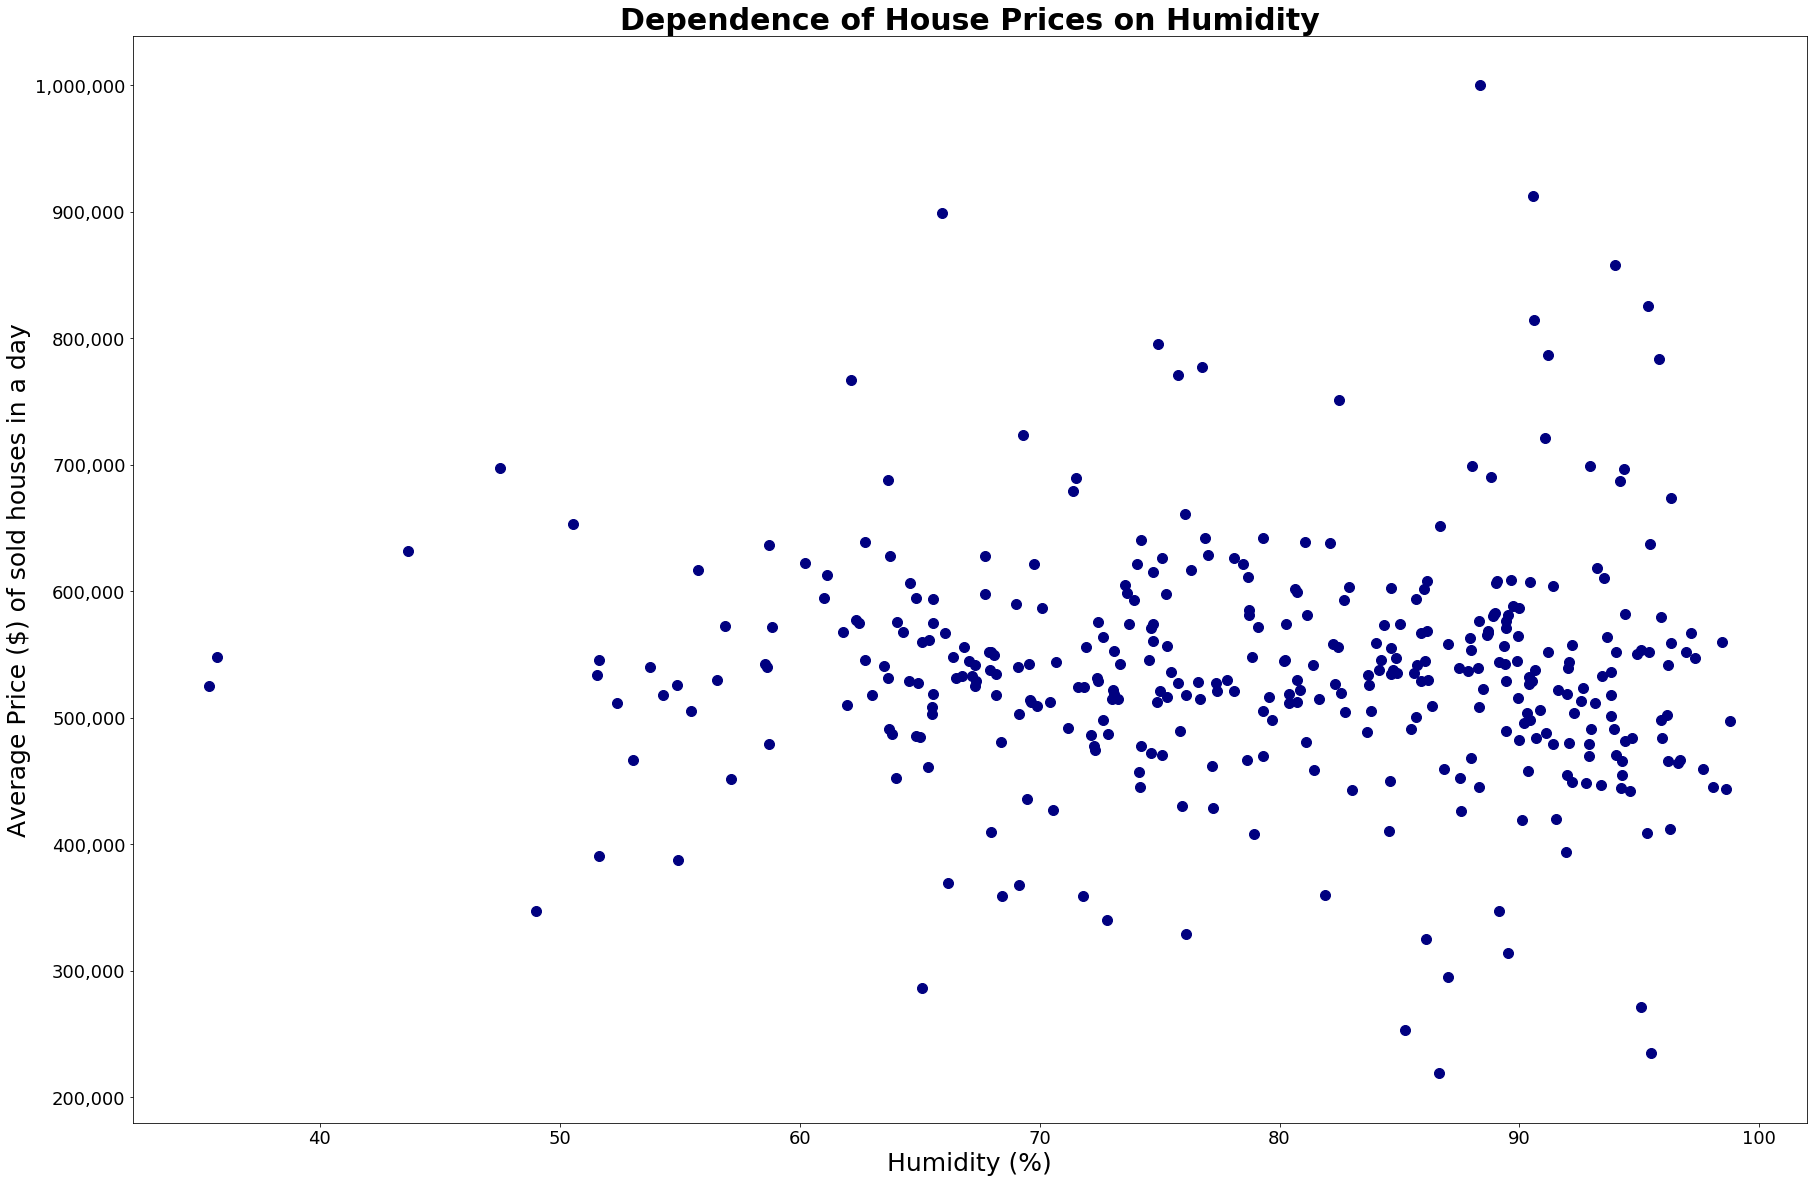

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [45]:
ax=wdf.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(wdf.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


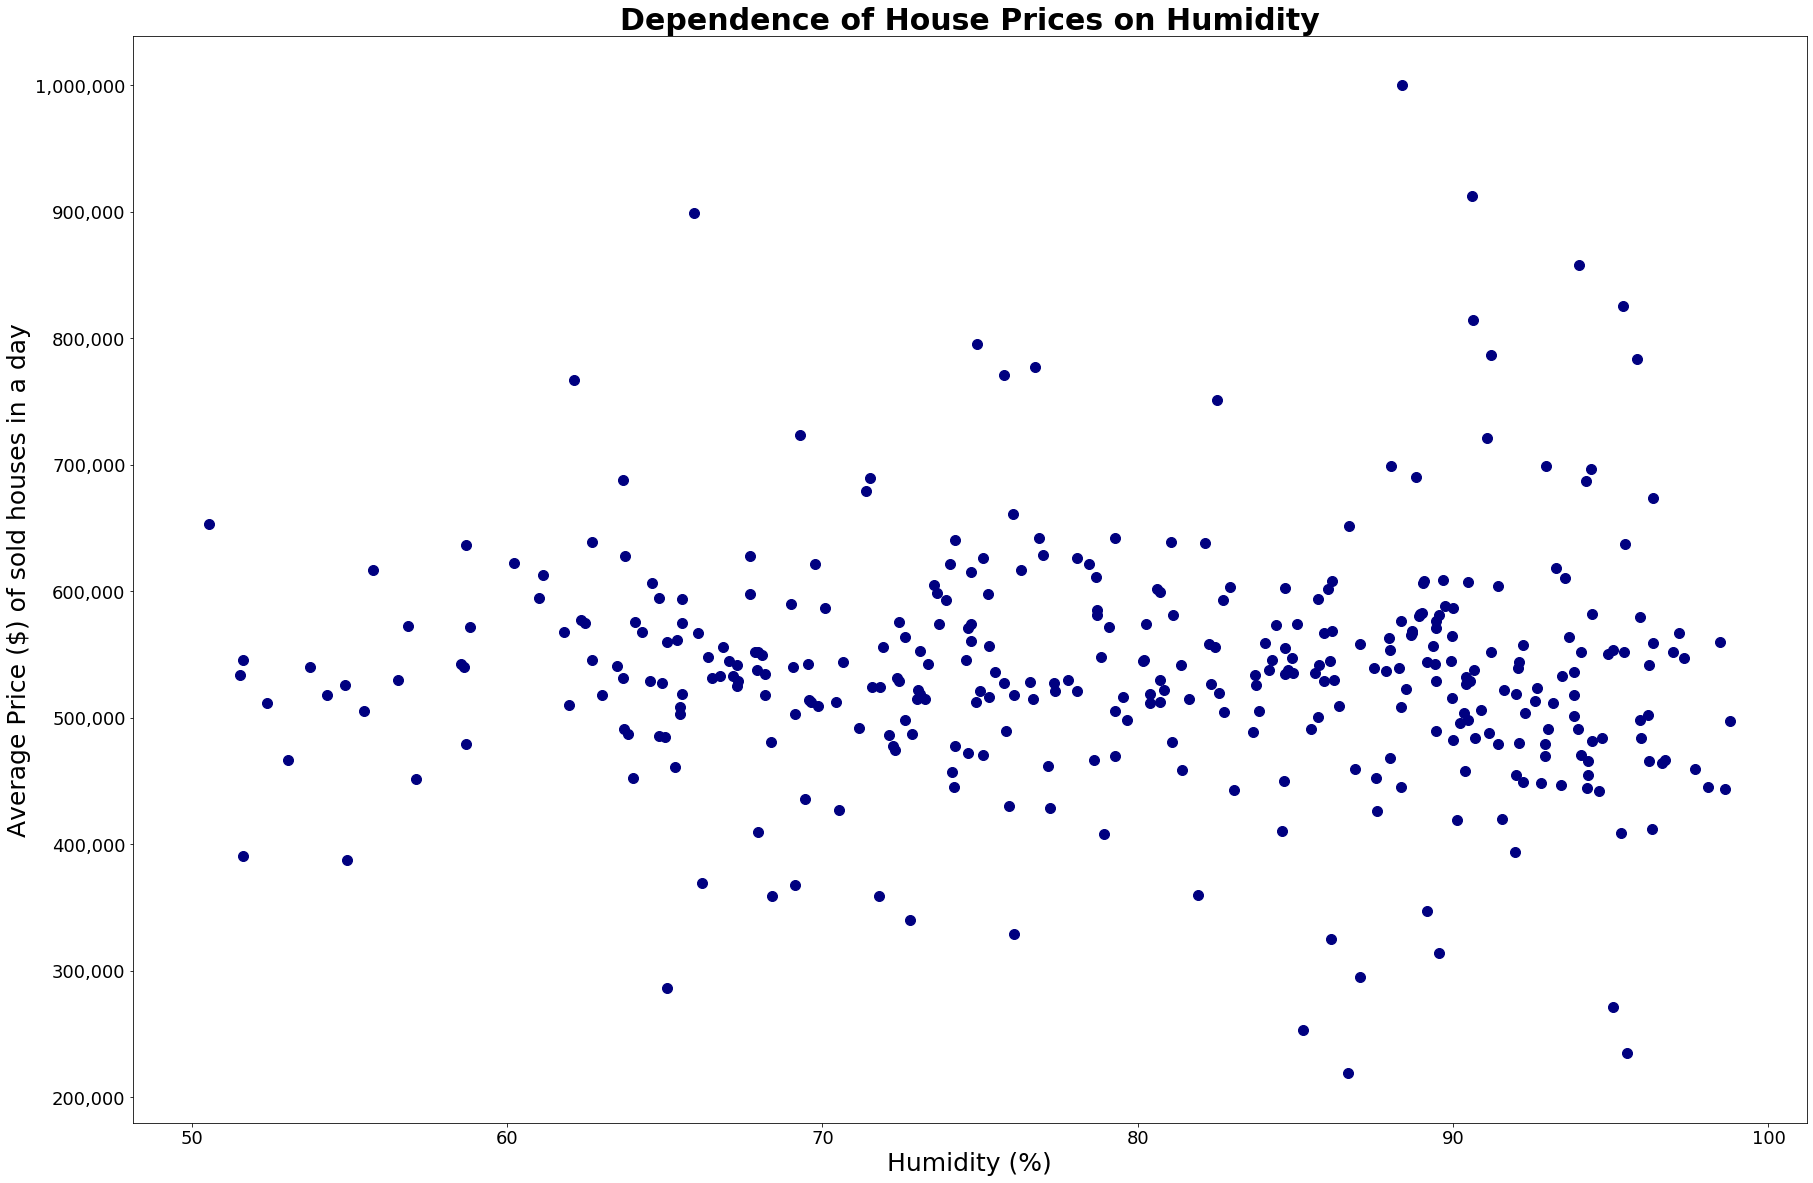

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [46]:
humiditynobiasdf=wdf.loc[wdf['Humidity']>50]
ax=humiditynobiasdf.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(humiditynobiasdf.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Price ($) of sold houses in a day", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


In [47]:
housesalescount = df.groupby('date').count()
housesalescount

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y)
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
2014-05-03,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2014-05-04,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2014-05-05,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
2014-05-06,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2015-05-14,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2015-05-15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )
merged2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y),Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,16.163522,54.875000,18.208333,0.708333
2014-05-03,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,10.194961,78.625000,82.208333,1.000000
2014-05-04,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,8.960943,89.458333,91.625000,0.958333
2014-05-05,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,10.799583,89.541667,88.333333,1.666667
2014-05-06,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,11.157323,83.708333,38.125000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,8.864440,93.166667,88.250000,0.833333
2015-05-14,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,9.033814,91.416667,77.958333,0.375000
2015-05-15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,10.121395,84.625000,57.375000,0.375000


In [49]:
salescountvsweatherdf = merged2[["id", "Temperature (C)", "Humidity", "Cloudliness", "Wind Speed"]]
salescountvsweatherdf=salescountvsweatherdf.rename(columns={"id" : "Average Number of Houses Sold"})
salescountvsweatherdf

,Average Number of Houses Sold,Temperature (C),Humidity,Cloudliness,Wind Speed
date,,,,,
2014-05-02,67,16.163522,54.875000,18.208333,0.708333
2014-05-03,4,10.194961,78.625000,82.208333,1.000000
2014-05-04,5,8.960943,89.458333,91.625000,0.958333
2014-05-05,84,10.799583,89.541667,88.333333,1.666667
2014-05-06,83,11.157323,83.708333,38.125000,1.166667
...,...,...,...,...,...
2015-05-13,31,8.864440,93.166667,88.250000,0.833333
2015-05-14,11,9.033814,91.416667,77.958333,0.375000
2015-05-15,1,10.121395,84.625000,57.375000,0.375000


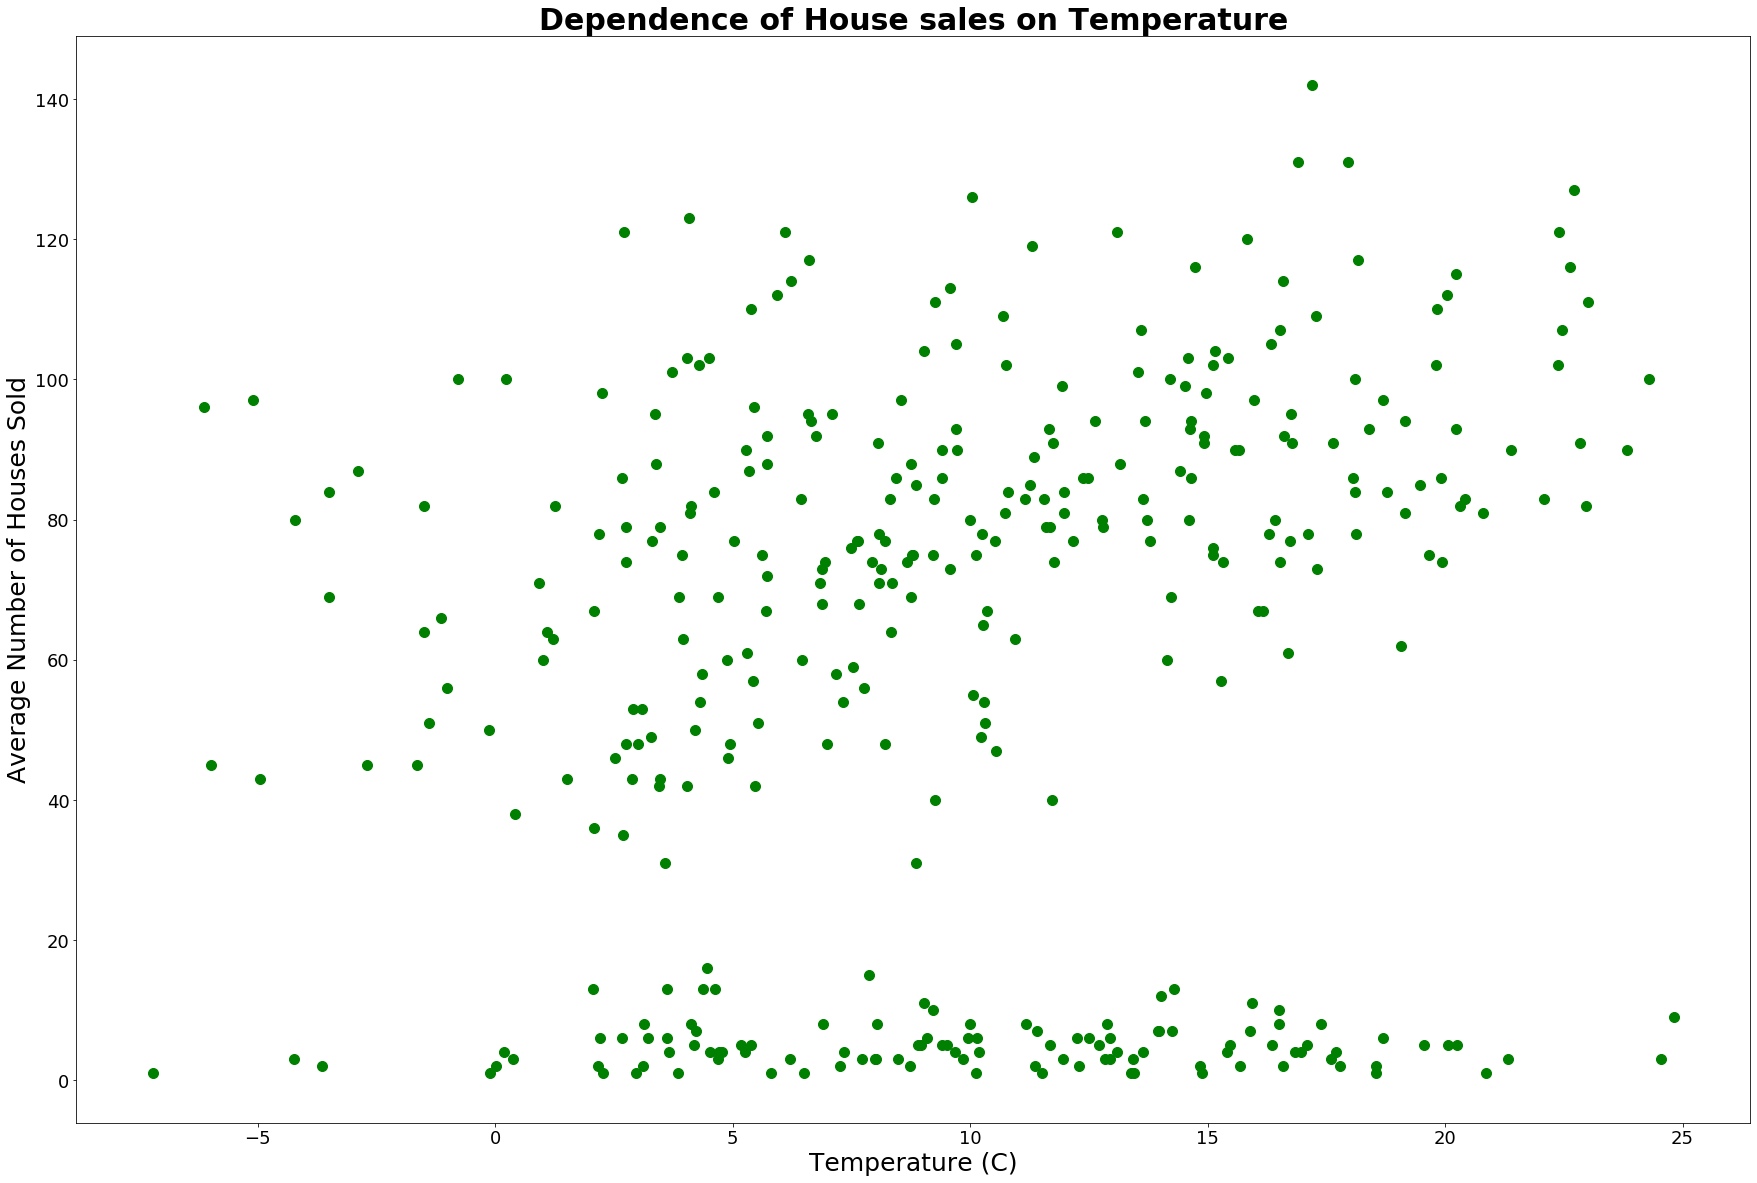

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [50]:
salescountvsweatherdf.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


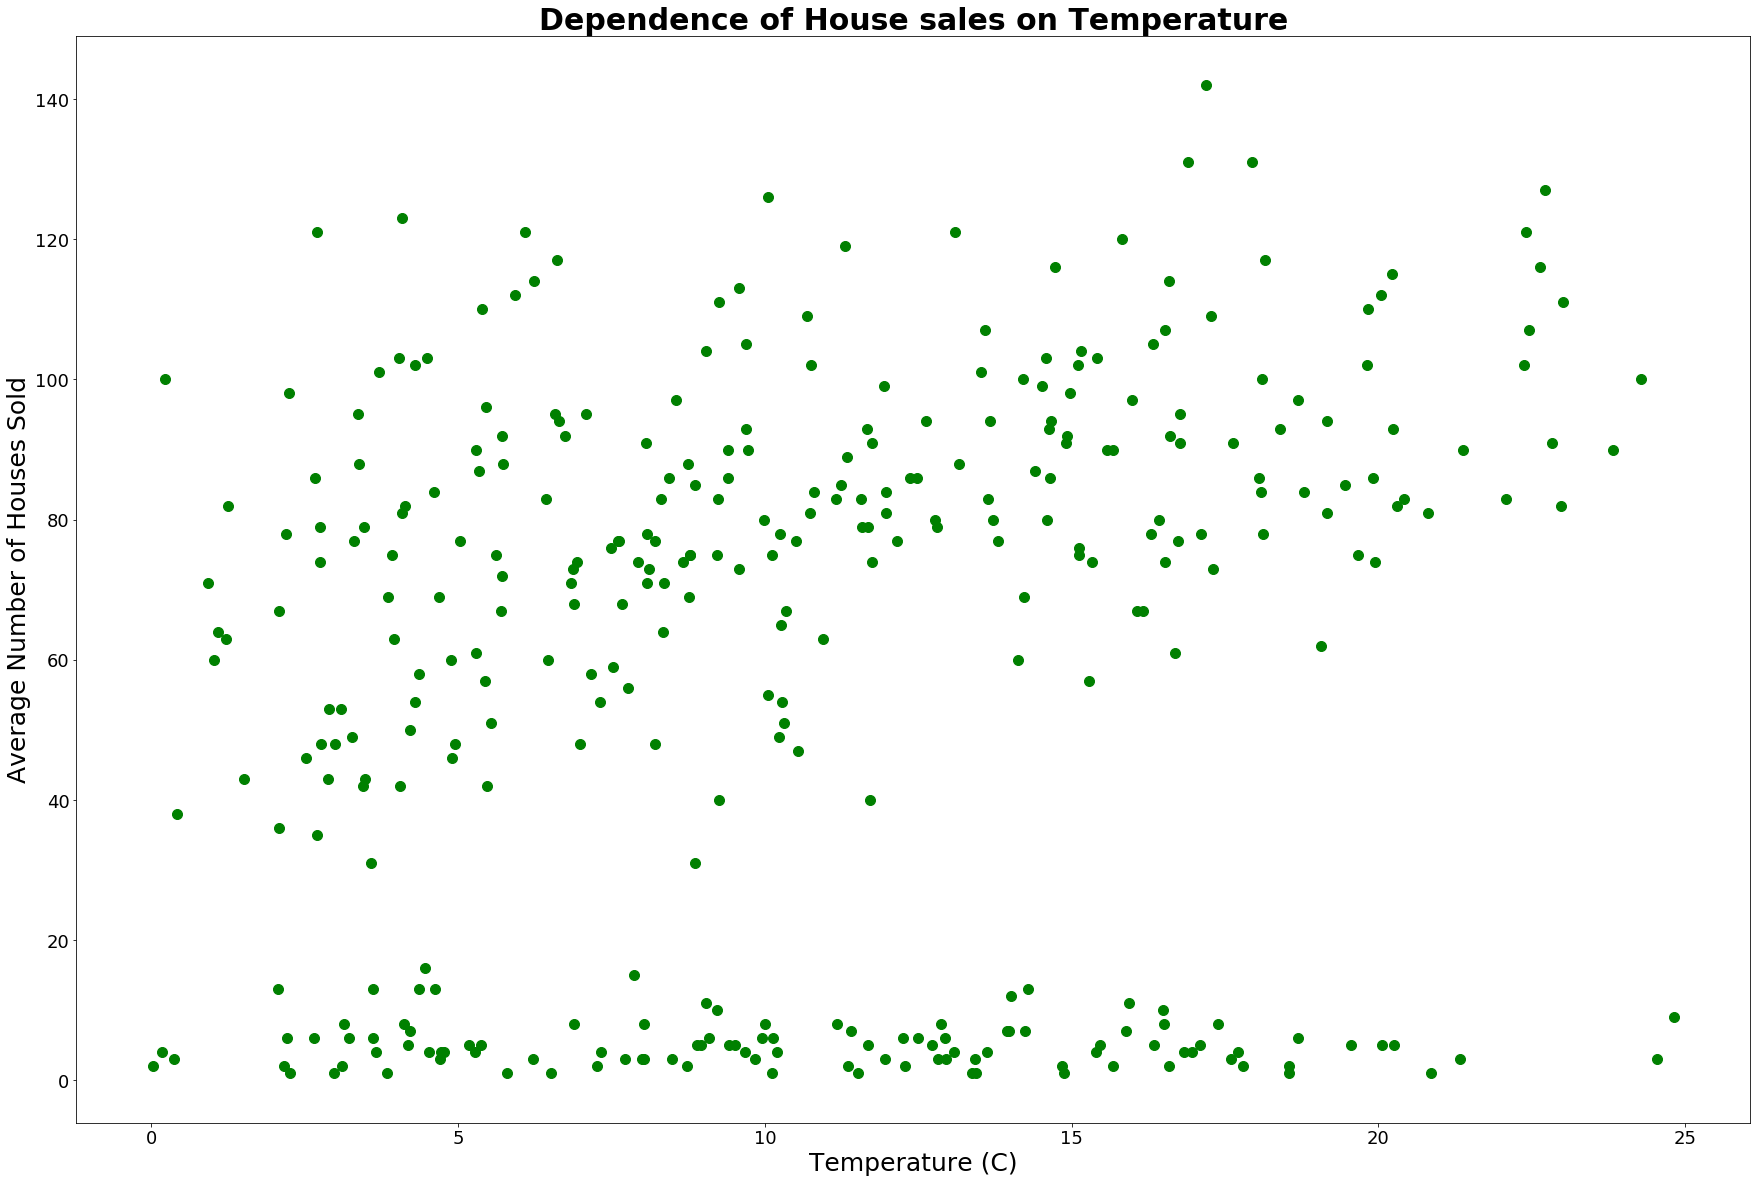

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [51]:
salescountvsweatherdfnotempbias=salescountvsweatherdf.loc[salescountvsweatherdf['Temperature (C)']>0]
salescountvsweatherdfnotempbias.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdfnotempbias.index)
# Chart title
plt.title("Dependence of House sales on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


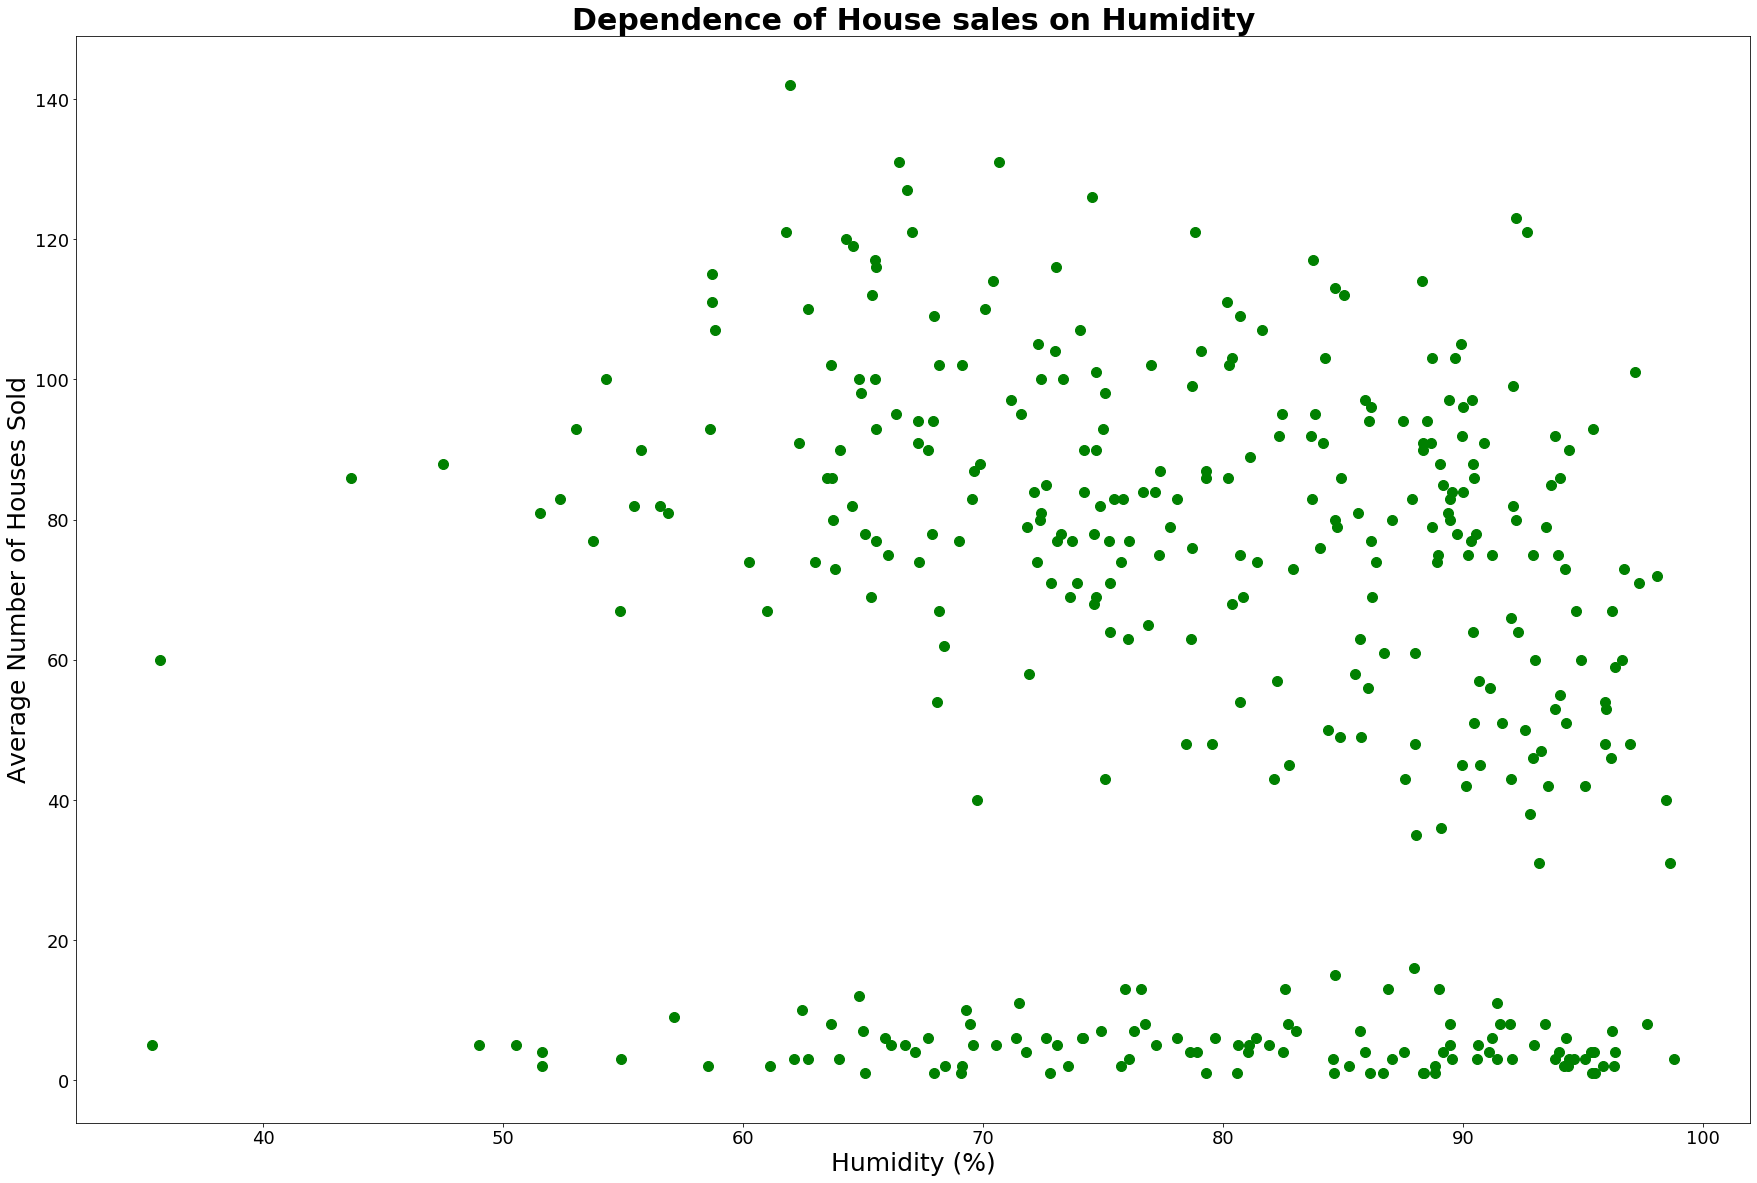

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [52]:
salescountvsweatherdf.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


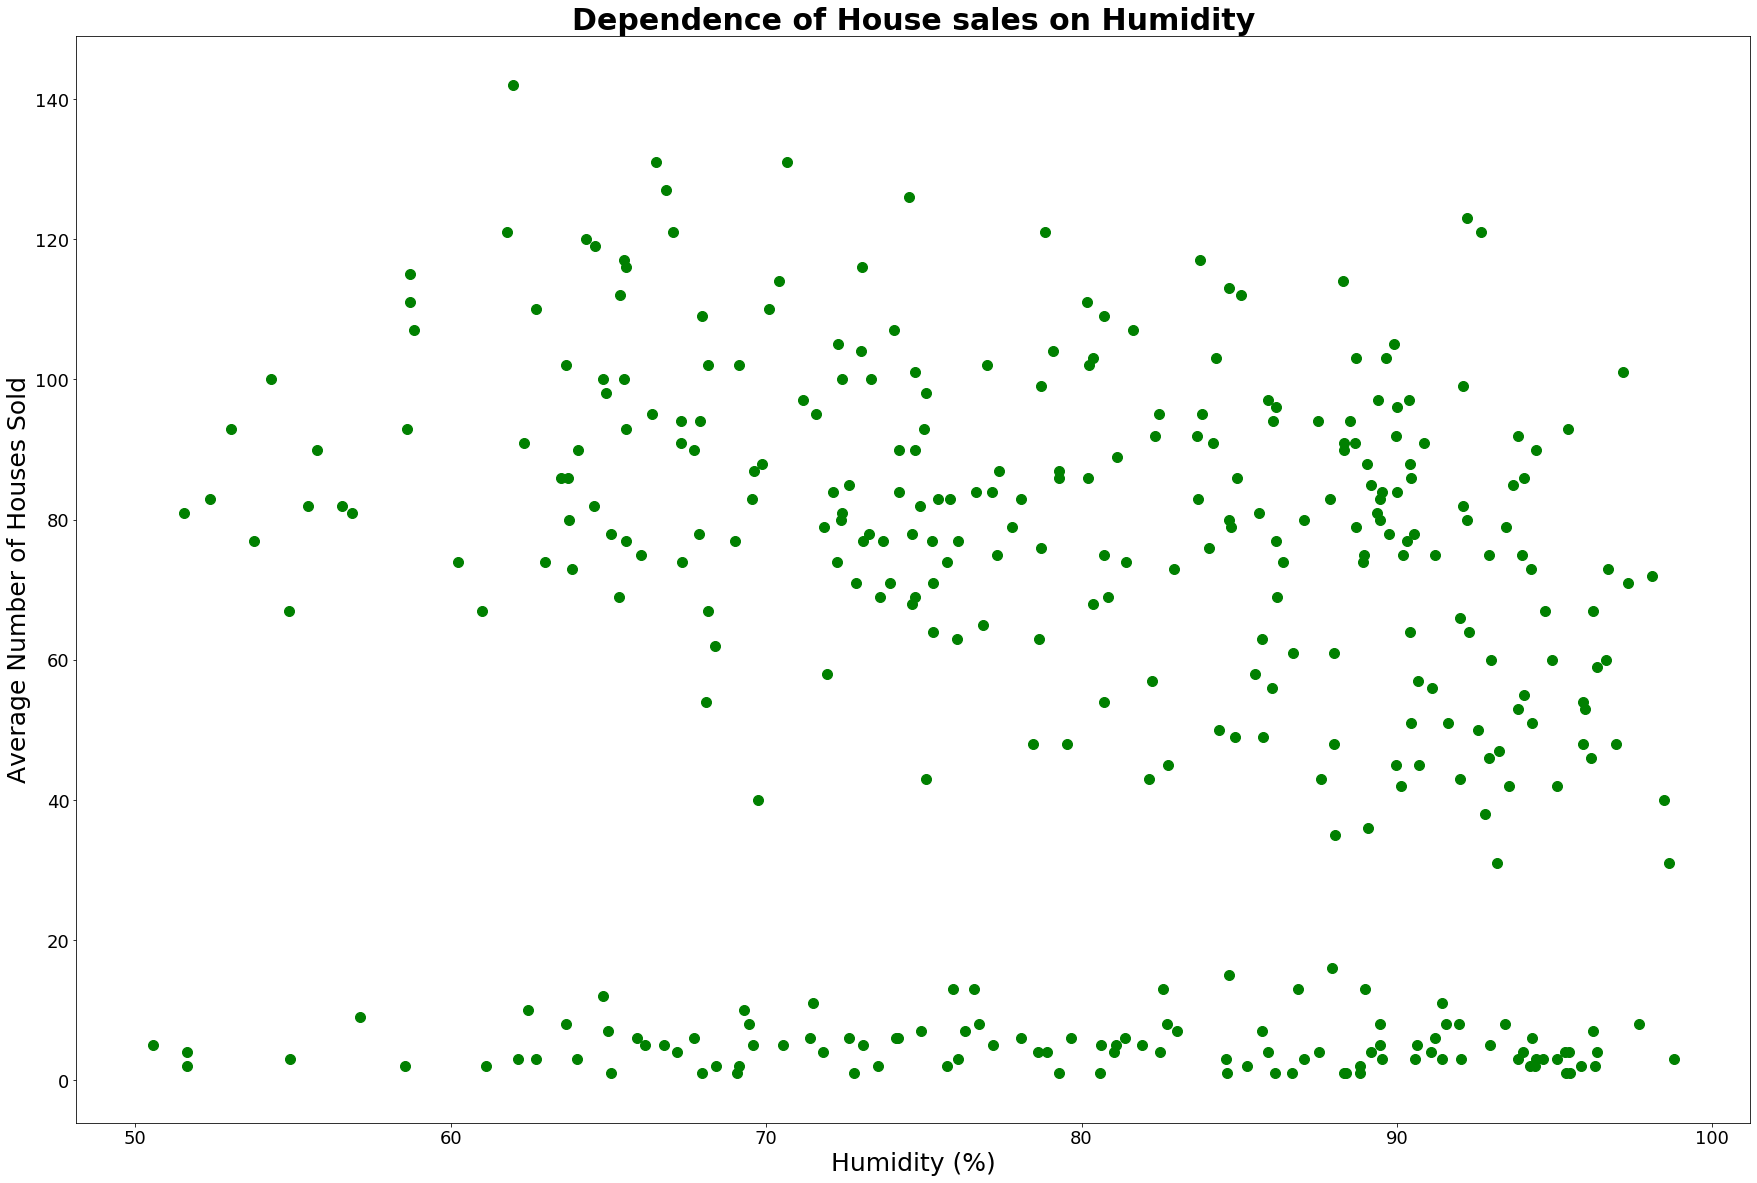

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [53]:
salescountvsweatherdfnohumdbias=salescountvsweatherdf.loc[salescountvsweatherdf['Humidity']>50]
salescountvsweatherdfnohumdbias.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdfnohumdbias.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


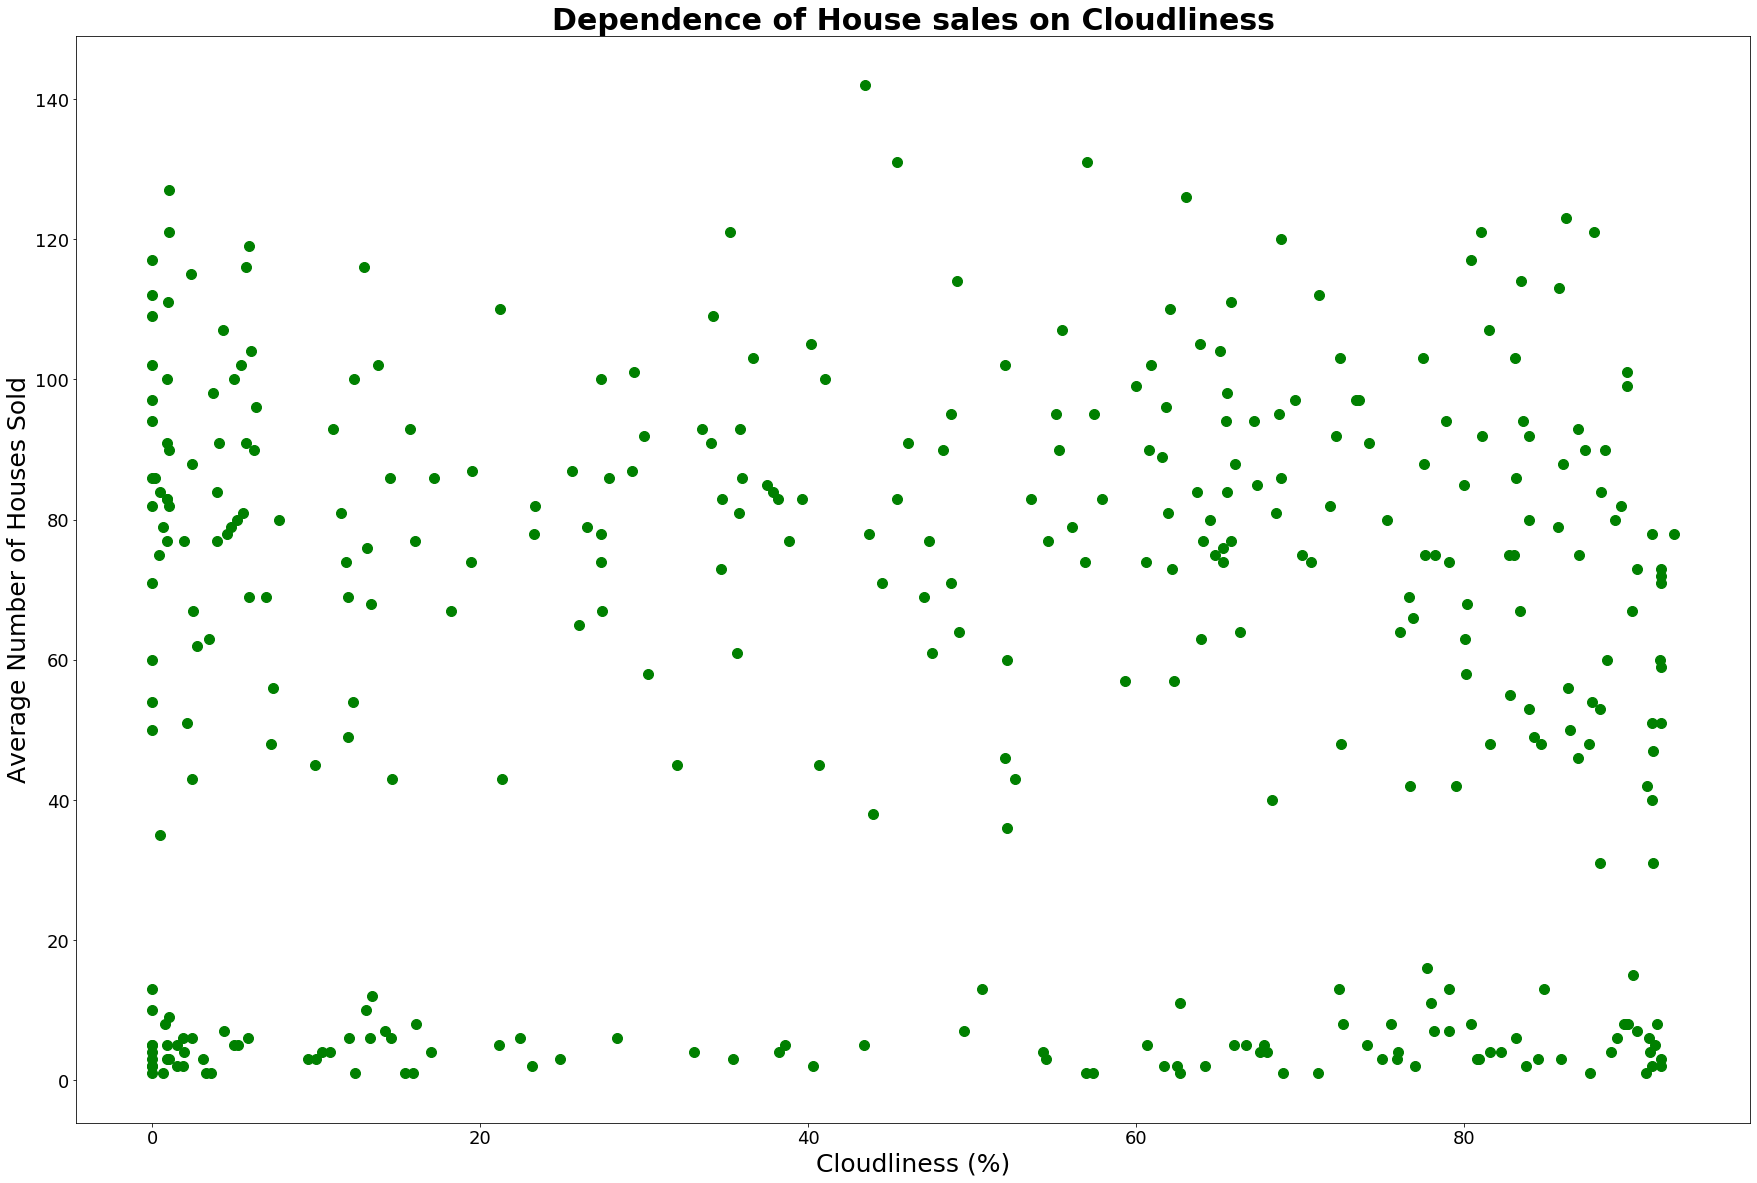

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [54]:
salescountvsweatherdf.plot(kind='scatter', x='Cloudliness', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')

In [55]:
salescountbymonth = df.groupby('date(Y/M)').count()
salescountbymonth = salescountbymonth[['id']]
salescountbymonth = salescountbymonth.rename(columns={'id':'Average Number of the Houses Sold'})
salescountbymonth

,Average Number of the Houses Sold
date(Y/M),
2014-05,1768
2014-06,2180
2014-07,2211
2014-08,1940
2014-09,1774
2014-10,1878
2014-11,1411
2014-12,1471
2015-01,978


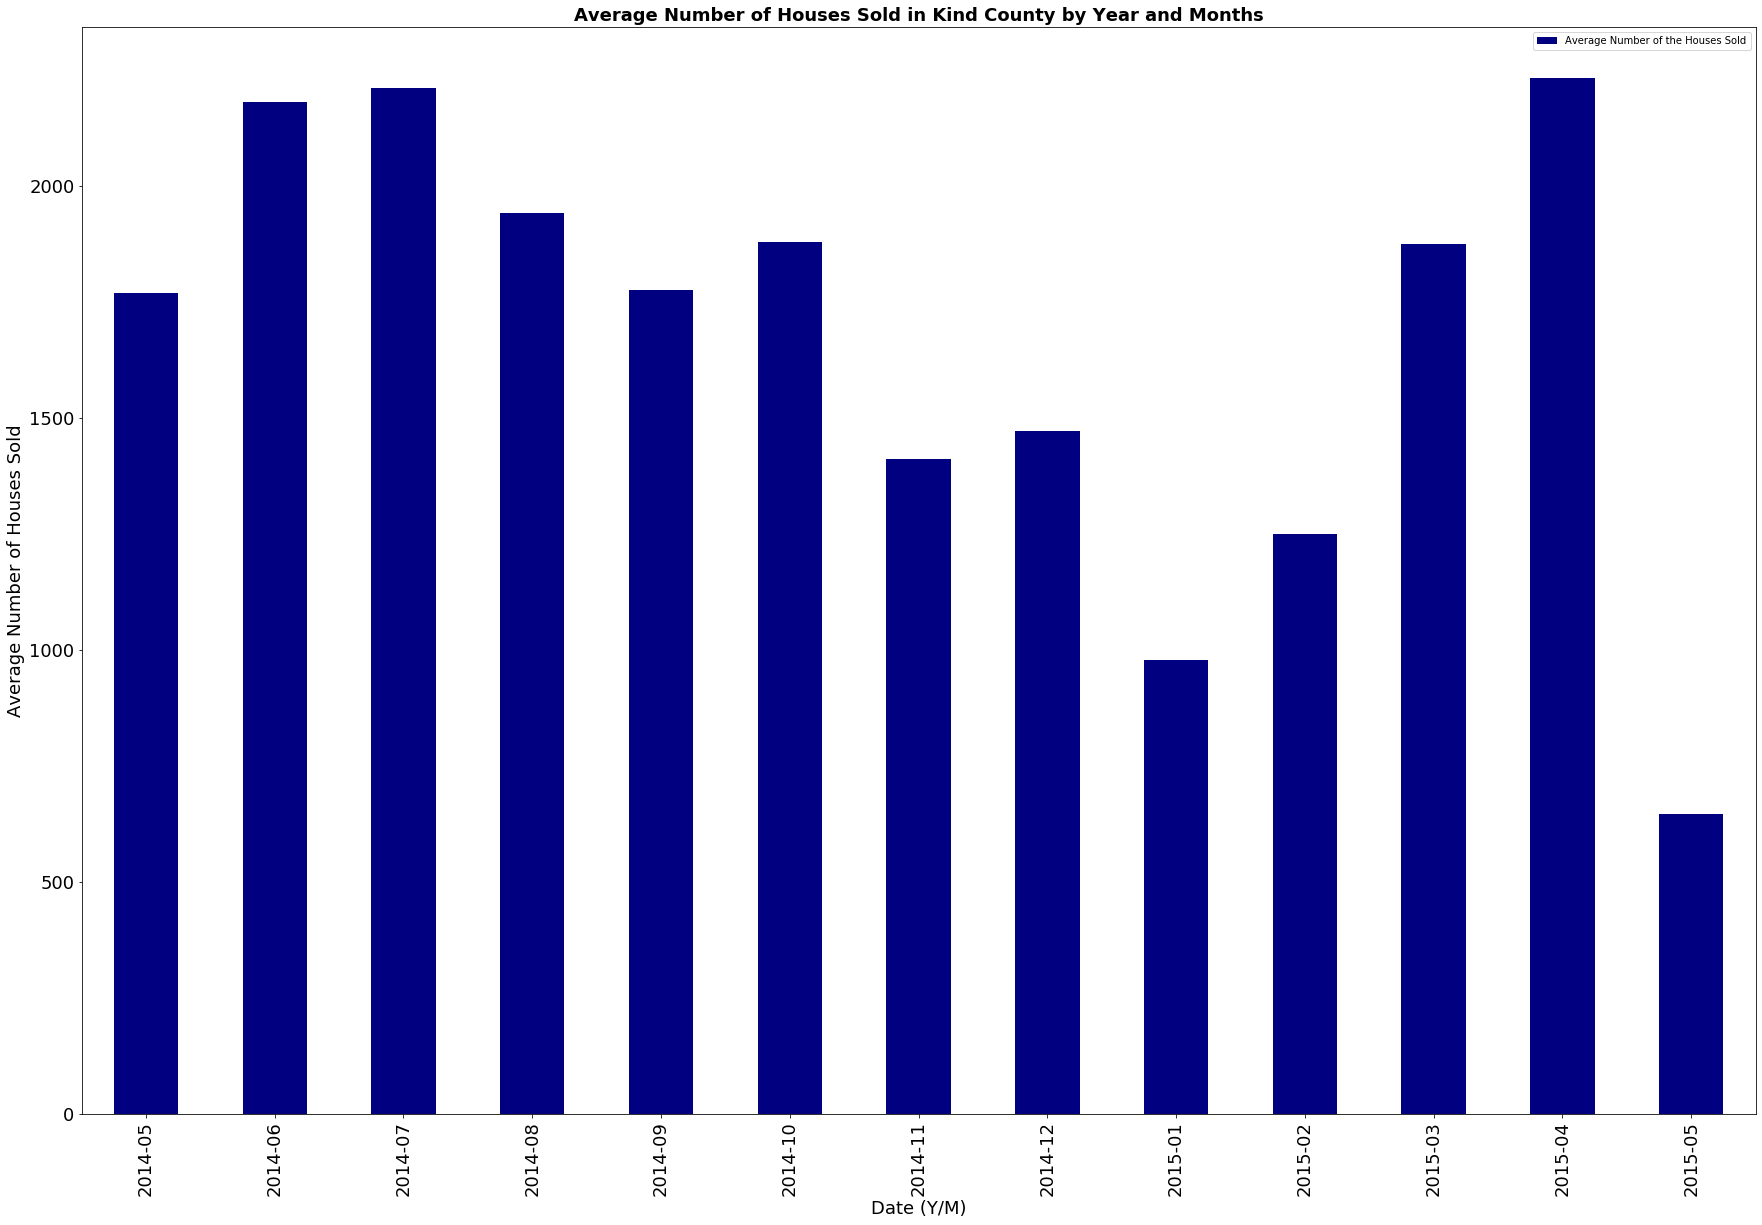

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [56]:
salescountbymonth.plot(kind='bar', y='Average Number of the Houses Sold', color='navy')

x_lim = len(salescountbymonth.index)
# Chart title
plt.title("Average Number of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housessoldbyyearandmonth.png')

In [57]:
averagehousepricebyyearandmonth = df.groupby('date(Y/M)').mean()
averagehousepricebyyearandmonth=averagehousepricebyyearandmonth[['price']]
averagehousepricebyyearandmonth

,price
date(Y/M),
2014-05,548166.600113
2014-06,558123.736239
2014-07,544892.161013
2014-08,536527.039691
2014-09,529315.868095
2014-10,539127.477636
2014-11,522058.861800
2014-12,524602.893270
2015-01,525963.251534


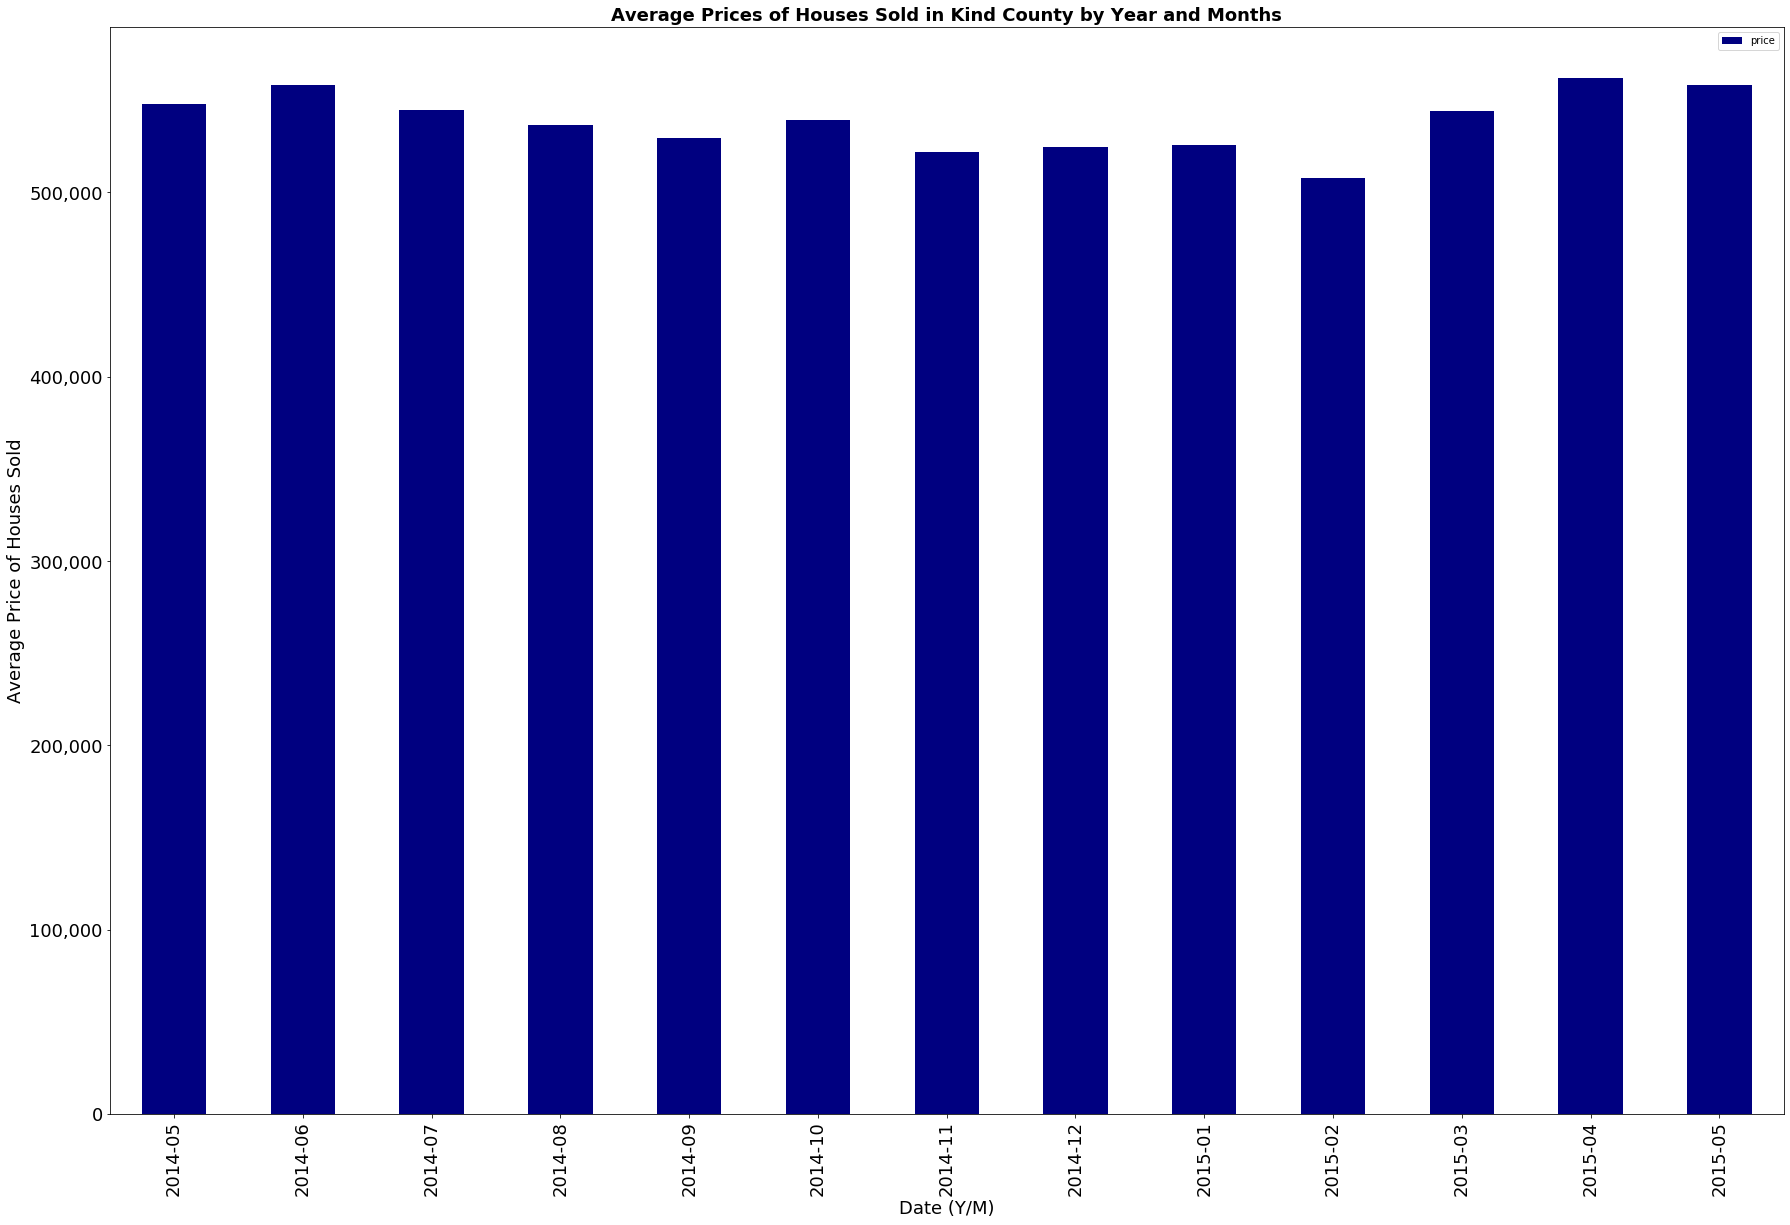

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [58]:
ax=averagehousepricebyyearandmonth.plot(kind='bar', y='price', color='navy')

x_lim = len(averagehousepricebyyearandmonth.index)
# Chart title
plt.title("Average Prices of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Price of Houses Sold", fontdict = {'fontsize': 18})
# legend 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesbyyearandmonth.png')

In [59]:
weatherdata.groupby('date(Y/M)').mean()

,Temperature (C),Humidity,Cloudliness,Wind Speed
date(Y/M),,,,
2013-01,2.541290,76.581989,64.669355,1.198925
2013-02,6.016165,75.611607,76.558036,1.697917
2013-03,7.138878,66.061828,60.897849,1.041667
2013-04,9.459154,69.781944,58.947222,1.879167
2013-05,13.585724,52.876344,42.327957,1.248656
2013-06,16.259861,60.609722,49.747222,0.800000
2013-07,18.301708,57.524194,8.356183,0.666667
2013-08,17.912518,63.607527,39.805108,0.681452
2013-09,15.300842,80.112500,50.676389,1.115278


In [60]:
weatherdata

,date,Temperature (C),Humidity,Cloudliness,Weather Condition,Wind Speed,date(Y/M)
0,2013-01-01,2.470,93,1,Clear,1,2013-01
1,2013-01-01,2.460,93,1,Clear,0,2013-01
2,2013-01-01,1.080,93,20,Clouds,0,2013-01
3,2013-01-01,0.800,0,1,Mist,0,2013-01
4,2013-01-01,0.400,0,75,Mist,0,2013-01
...,...,...,...,...,...,...,...
26272,2015-12-31,2.350,74,1,Rain,1,2015-12
26273,2015-12-31,4.050,41,1,Clear,2,2015-12
26274,2015-12-31,4.375,44,1,Clear,1,2015-12
26275,2015-12-31,4.700,48,1,Clear,0,2015-12


In [61]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
...                ..   ...    ...       ...        ...          ...   
98034   2014-07    64    64     64        64         64           64   
98103   2014-06    65    65     65        65         65           65   
        2014-10    66    66     66        66         66           66   
        2014-07    73    73     73        73         73           73   
98052   2014-07    73    73     73        73         73           73   

                   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
zipcode date(Y/M)                                      ...                      
98039   2015-05           1       1           1     1  ...      1           1   
98148   2015-01           1       1           1     1  ...      1           1   
98109   2015-05           2       2           2     2  ...      2           2   
98014   2015-05           2       2           2     2  ...      2           2   
98024   2014-12           2       2           2     2  ...      2           2   
...                     ...     ...         ...   ...  ...    ...         ...   
98034   2014-07          64      64          64    64  ...     64          64   
98103   2014-06          65      65          65    65  ...     65          65   
        2014-10          66      66          66    66  ...     66          66   
        2014-07          73      73          73    73  ...     73          73   
98052   2014-07          73      73          73    73  ...     73          73   

                   sqft_basement  yr_built  yr_renovated  lat  long  \
zipcode date(Y/M)                                                     
98039   2015-05                1         1             1    1     1   
98148   2015-01                1         1             1    1     1   
98109   2015-05                2         2             2    2     2   
98014   2015-05                2         2             2    2     2   
98024   2014-12                2         2             2    2     2   
...                          ...       ...           ...  ...   ...   
98034   2014-07               64        64            64   64    64   
98103   2014-06               65        65            65   65    65   
        2014-10               66        66            66   66    66   
        2014-07               73        73            73   73    73   
98052   2014-07               73        73            73   73    73   

                   sqft_living15  sqft_lot15  date(Y)  
zipcode date(Y/M)                                      
98039   2015-05                1           1        1  
98148   2015-01                1           1        1  
98109   2015-05                2           2        2  
98014   2015-05                2           2        2  
98024   2014-12                2           2        2  
...                          ...         ...      ...  
98034   2014-07               64          64       64  
98103   2014-06               65          65       65  
        2014-10               66          66       66  
        2014-07               73          73       73  
98052   2014-07               73          73       73  

[904 rows x 21 columns]

In [62]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,date(Y/M),date(Y)
zipcode,,,,,,,,,,,,,,,,,,,,,
98039,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
98148,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
98024,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
98010,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
98102,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98117,553,553,553,553,553,553,553,553,553,553,...,553,553,553,553,553,553,553,553,553,553
98052,574,574,574,574,574,574,574,574,574,574,...,574,574,574,574,574,574,574,574,574,574
98115,583,583,583,583,583,583,583,583,583,583,...,583,583,583,583,583,583,583,583,583,583


In [63]:
biasanalysis=mergedtable.dropna()
biasanalysis

,Temperature (C),Humidity,Cloudliness,Wind Speed,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,16.163522,54.875000,18.208333,0.708333,4.088342e+09,5.261918e+05,3.402985,2.138060,2102.835821,15640.477612,...,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
2014-05-03,10.194961,78.625000,82.208333,1.000000,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,...,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
2014-05-04,8.960943,89.458333,91.625000,0.958333,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,...,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
2014-05-05,10.799583,89.541667,88.333333,1.666667,4.571210e+09,5.810577e+05,3.523810,2.193452,2257.845238,17966.309524,...,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
2014-05-06,11.157323,83.708333,38.125000,1.166667,4.553568e+09,5.341684e+05,3.493976,2.171687,2102.168675,12127.662651,...,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-13,8.864440,93.166667,88.250000,0.833333,4.625505e+09,5.116239e+05,3.193548,2.088710,1922.322581,8165.096774,...,7.548387,1673.096774,249.225806,1969.838710,64.322581,98076.774194,47.528861,-122.244194,1927.806452,8278.774194
2015-05-14,9.033814,91.416667,77.958333,0.375000,6.159145e+09,6.038908e+05,3.818182,2.340909,2093.909091,9393.363636,...,7.909091,1919.363636,174.545455,1986.454545,0.000000,98083.818182,47.507082,-122.251182,2121.727273,7709.181818
2015-05-15,10.121395,84.625000,57.375000,0.375000,7.923600e+09,4.500000e+05,5.000000,2.000000,1870.000000,7344.000000,...,7.000000,1870.000000,0.000000,1960.000000,0.000000,98007.000000,47.595100,-122.144000,1870.000000,7650.000000


In [64]:
numberofsalesdays=biasanalysis['Humidity'].count()
numberofsalesdays

372

In [65]:
weather=weatherbydateymd.reset_index()
weather

,date,Temperature (C),Humidity,Cloudliness,Wind Speed
0,2013-01-01,0.619583,61.958333,33.416667,0.250000
1,2013-01-02,0.534167,77.500000,12.291667,1.000000
2,2013-01-03,0.463750,54.166667,22.708333,2.291667
3,2013-01-04,1.745833,57.125000,1.000000,1.458333
4,2013-01-05,3.907366,83.333333,84.375000,1.750000
...,...,...,...,...,...
1091,2015-12-28,2.579458,94.666667,89.125000,0.875000
1092,2015-12-29,2.798354,95.416667,87.041667,0.750000
1093,2015-12-30,0.159417,92.916667,6.375000,0.333333
1094,2015-12-31,-1.076479,85.333333,0.791667,0.500000


In [66]:
mask = (weather['date'] > '2014-05-01') & (weather['date'] <= '2015-05-27')
biasweather=pd.DataFrame(weather.loc[mask])
biasweather

,date,Temperature (C),Humidity,Cloudliness,Wind Speed
486,2014-05-02,16.163522,54.875000,18.208333,0.708333
487,2014-05-03,10.194961,78.625000,82.208333,1.000000
488,2014-05-04,8.960943,89.458333,91.625000,0.958333
489,2014-05-05,10.799583,89.541667,88.333333,1.666667
490,2014-05-06,11.157323,83.708333,38.125000,1.166667
...,...,...,...,...,...
872,2015-05-23,12.481082,71.041667,35.708333,0.541667
873,2015-05-24,11.517940,88.333333,87.666667,0.708333
874,2015-05-25,11.540710,87.083333,77.416667,0.750000
875,2015-05-26,12.116251,82.458333,62.125000,0.625000


In [67]:
weatherdatadays= biasweather['Temperature (C)'].count()
weatherdatadays

391

In [68]:
abovezerodays=biasweather.loc[biasweather['Temperature (C)']>=0]
numberofabovezerodays=abovezerodays['Temperature (C)'].count()
numberofabovezerodays

369

In [69]:
abovezerosales=biasanalysis.loc[biasanalysis['Temperature (C)']>=0]
numberofabovezerosales=abovezerosales['price'].count()
numberofabovezerosales

351

In [70]:
belowzerodays=biasweather.loc[biasweather['Temperature (C)']<=0]
numberofbelowzerodays=belowzerodays['Temperature (C)'].count()
numberofbelowzerodays

22

In [71]:
belowzerosales=biasanalysis.loc[biasanalysis['Temperature (C)']<=0]
numberofbelowzerosalesdays=belowzerosales['price'].count()
numberofbelowzerosalesdays

21

In [72]:
abovefiftyhdays=biasweather.loc[biasweather['Humidity']>=50]
abovefiftyhumiditydays=abovezerodays['Humidity'].count()
abovefiftyhumiditydays

369

In [73]:
abovefiftyhsales=biasanalysis.loc[biasanalysis['Humidity']>=50]
abovefiftyhumiditysalesdays=abovefiftyhsales['Humidity'].count()
abovefiftyhumiditysalesdays

367

In [74]:
belowfiftyhdays=biasweather.loc[biasweather['Humidity']<=50]
belowfiftyhumiditydays=belowfiftyhdays['Humidity'].count()
belowfiftyhumiditydays

5

In [75]:
belowfiftyhsales=biasanalysis.loc[biasanalysis['Humidity']<=50]
belowfiftyhumiditysalesdays=belowfiftyhsales['Humidity'].count()
belowfiftyhumiditysalesdays                                  

5

In [76]:
belowthreewdays=biasweather.loc[biasweather['Wind Speed']<=3]
belowthreewinddays=belowthreewdays['Wind Speed'].count()
belowthreewinddays

386

In [77]:
belowthreewsales=biasanalysis.loc[biasanalysis['Wind Speed']<=3]
belowthreewindsalesdays=belowthreewsales['Wind Speed'].count()
belowthreewindsalesdays

367

In [78]:
abovethreewdays=biasweather.loc[biasweather['Wind Speed']>=3]
abovethreewinddays=abovethreewdays['Wind Speed'].count()
abovethreewinddays

5

In [79]:
abovethreewsales=biasanalysis.loc[biasanalysis['Wind Speed']>=3]
abovethreewindsalesdays=abovethreewsales['Wind Speed'].count()
abovethreewindsalesdays

5

In [80]:
Biasanalysistable=pd.DataFrame({'Number of days with weather data':weatherdatadays,
                               'Number of days in which sales has happened':numberofsalesdays,
                               'Number of days with temp above zero': numberofabovezerodays,
                               'Number of days with temp below zero':numberofbelowzerodays,
                               'Number of sales days with temp above zero':numberofabovezerosales,
                               'Number of sales days with temp below zero':numberofbelowzerosalesdays,
                               'Number of days with humidity above fifty':abovefiftyhumiditydays,
                               'Number of days with humidity below fifty':belowfiftyhumiditydays,
                               'Number of sales days with humidity above fifty':abovefiftyhumiditysalesdays,
                               'Number of sales days with humidity below fifty':belowfiftyhumiditysalesdays,
                               'Number of days with wind speed below three':belowthreewinddays,
                               'Number of days with wind speed above three':abovethreewinddays,
                               'Number of sales days with wind speed below three':belowthreewindsalesdays,
                               'Number of sales days with wind speed above three':abovethreewindsalesdays}, index=[0])
Biasanalysistable

,Number of days with weather data,Number of days in which sales has happened,Number of days with temp above zero,Number of days with temp below zero,Number of sales days with temp above zero,Number of sales days with temp below zero,Number of days with humidity above fifty,Number of days with humidity below fifty,Number of sales days with humidity above fifty,Number of sales days with humidity below fifty,Number of days with wind speed below three,Number of days with wind speed above three,Number of sales days with wind speed below three,Number of sales days with wind speed above three
0,391,372,369,22,351,21,369,5,367,5,386,5,367,5


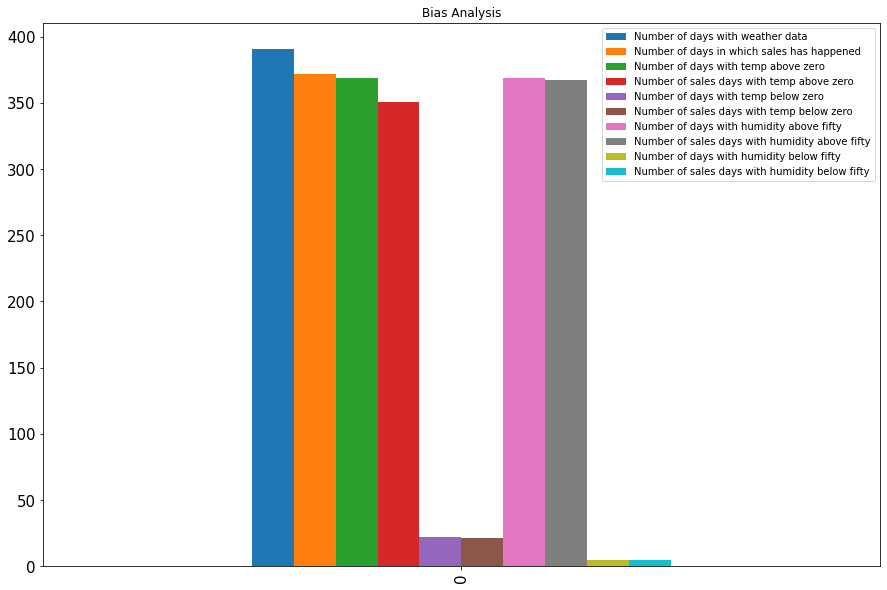

Current size: [30, 20]


<Figure size 2160x1440 with 0 Axes>

In [81]:
ax = Biasanalysistable[['Number of days with weather data','Number of days in which sales has happened',
                        'Number of days with temp above zero', 'Number of sales days with temp above zero',
                       'Number of days with temp below zero', 'Number of sales days with temp below zero',
                       'Number of days with humidity above fifty','Number of sales days with humidity above fifty',
                       'Number of days with humidity below fifty','Number of sales days with humidity below fifty',
                       ]].plot(kind='bar', title ="Bias Analysis", figsize=(15, 10), legend=True, fontsize=15)


plt.show()

print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('biasanalysis.png')

